# Diagnosis of Impacting Factors on Hospital Readmission Rates


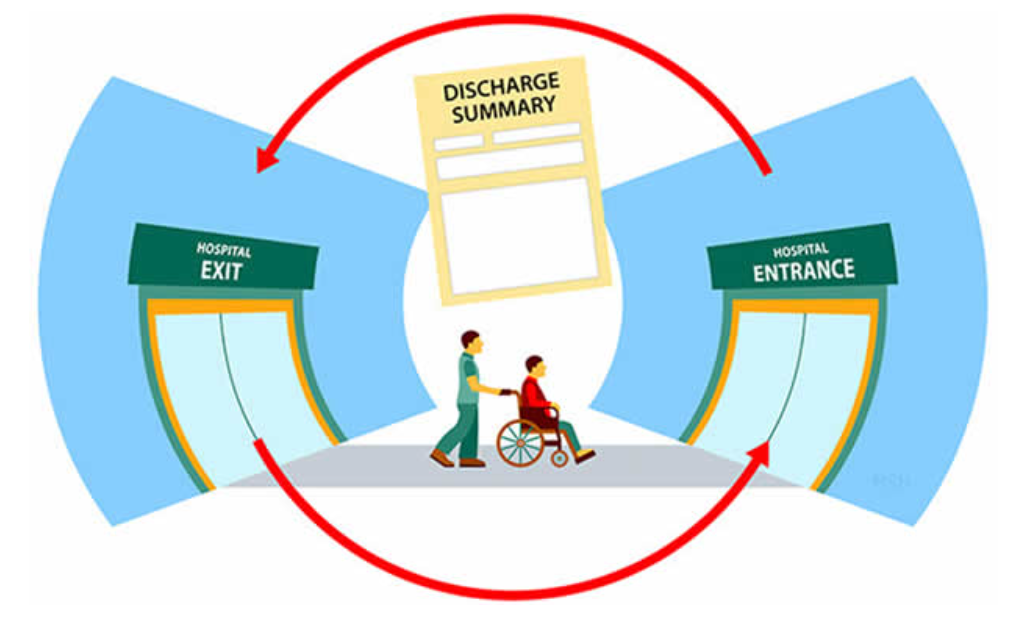


Problem Statement and Objective

A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. 

In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a diabetic patient records dataset (description below), to answer these questions:

1. What factors are the strongest predictors of hospital readmission in diabetic patients?
2. How well can we predict hospital readmission in this dataset with limited features?

# Data Set Description


**VARIABLE NAMES**: DESCRIPTION
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# to suppress the notation 'e'    
pd.options.display.float_format = '{:.6f}'.format

# import various metrics from 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression

# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [3]:
# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
#Load the dataset
df=pd.read_csv('diabetic_data.csv')
df.head(8).T

,0,1,2,3,4,5,6,7
encounter_id,2278392,149190,64410,500364,16680,35754,55842,63768
patient_nbr,8222157,55629189,86047875,82442376,42519267,82637451,84259809,114882984
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male,Male,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
weight,?,?,?,?,?,?,?,?
admission_type_id,6,1,1,1,1,2,3,1
discharge_disposition_id,25,1,1,1,1,1,1,1
admission_source_id,1,7,7,7,7,2,2,7
time_in_hospital,1,3,2,2,1,3,4,5


# Stage 1: Descriptive analysis and Preprocessing


In [5]:
#Checking size of dataset
df.shape

(101766, 50)

# Checking null Values

In [6]:
#checking missing values in dataset which are mentioned as '?'

for i in df.columns:
    print(i, df[i][df[i]=='?'].count())

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


null values are found in 7 variables i.e.,  weight, payer code, medical speciality, diag1, diag2, diag3, race.



column: weight
The attribute 'weight' contains approximate 98% of the missing values. Missing values in 'weight' column are not replaced. 
The column 'weight' is dropped.

column: Payer code
Variable 'Payer code' contains approximate 40% missing values.
so this attribute are dropped from the dataframe 'df'.

column: medical specialty
Variable 'medical specialty' contains approximate 50% missing values.
so this attribute are dropped from the dataframe 'df'.

In [7]:
df = df.drop(['weight','payer_code','medical_specialty'], axis=1)
df.head().T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[0-10),[10-20),[20-30),[30-40),[40-50)
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51


Dealing with Missing Values

columns: diag_1,diag_2,diag_3

In [8]:

#creating a sets of index numbers where diagnosis results (diag_1,diag_2,diag_3) are missing

s1 = set(df[df['diag_1'] == '?'].index)
s2 = set(df[df['diag_2'] == '?'].index)
s3 = set(df[df['diag_3'] == '?'].index)

print(len(s1), len(s2), len(s3))

21 358 1423


Dealing with Missing Values

column: race

In [9]:
s4= set(df[df['race']=='?'].index)
len(s4)

2273

The data of patients who were discharged to hospice or dead is not considered for the analysis to avoid biasing.

In [10]:
s5=set(df[df['discharge_disposition_id'] == 11].index)
len(s5)

1642

The indices with Unknown/invalid values in 'gender' column are dropped.

In [11]:
#Finding unique values in column gender
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [12]:
s6=set(df[df['gender']=='Unknown/Invalid'].index)
len(s6)

3

In [13]:
s7=s1.union(s2,s3,s4,s5,s6)
len(s7)

5320

In [14]:
for i in s7:
    df.drop(index=[i], inplace=True)

df.shape

(96446, 47)

Collapsing of Multiple Encounters for same patient Some patients in the dataset had more than one encounter.We could not count them as independent encounters because that bias the results towards those patients who had multiple encounters. 

In [15]:
df1=df.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

In [16]:
df1.shape

(67580, 47)

In [17]:
(96446-67580)*100/96446 

29.92970159467474

The columns encounter_id and patient_nbr are insignificant attributes for the analysis pf hospital readmission rate. 
So, both the columns are dropped.

In [18]:
df1.drop(['encounter_id',"patient_nbr"], axis =1 , inplace = True )

variables (drugs named citoglipton and examide), all records have the same value. So essentially these cannot provide any interpretive or discriminatory information for predicting readmission so we decided to drop these two variables

In [19]:
df1.drop(['citoglipton', 'examide'], axis = 1,  inplace = True ) 

The classes of features with value count less than 0.01 percent are dropped for 'discharge_disposition_id', 'admission_type_id', 'admission_source_id'. 


In [20]:
df1['discharge_disposition_id'].value_counts(normalize=True)

1    0.624889
3    0.126014
6    0.119592
18   0.035898
2    0.021841
22   0.020687
5    0.012800
25   0.010832
4    0.007325
7    0.005712
23   0.003759
13   0.003581
14   0.003181
28   0.001317
8    0.001051
15   0.000592
24   0.000370
9    0.000133
17   0.000118
10   0.000089
19   0.000089
27   0.000044
16   0.000044
12   0.000030
20   0.000015
Name: discharge_disposition_id, dtype: float64

In [21]:
discharge_disposition_id_unique = df1['discharge_disposition_id'].unique()
discharge_disposition_id_unique

array([ 1,  3,  6,  2,  5,  7, 25, 10, 14,  4, 18,  8, 12, 13, 17, 16, 22,
       23,  9, 15, 20, 28, 24, 19, 27], dtype=int64)

In [22]:
len(discharge_disposition_id_unique)

25

In [23]:

for i in discharge_disposition_id_unique:
    if len(df1[df1['discharge_disposition_id']==i]) < 0.01*df1.shape[0]:
        print(i)

7
10
14
4
8
12
13
17
16
23
9
15
20
28
24
19
27


In [24]:
s_7 = set(df1[df1['discharge_disposition_id']==7].index)
s_10 = set(df1[df1['discharge_disposition_id']==10].index)
s_14 = set(df1[df1['discharge_disposition_id']==14].index)
s_4 = set(df1[df1['discharge_disposition_id']==4].index)
s_8 = set(df1[df1['discharge_disposition_id']==8].index)
s_12 = set(df1[df1['discharge_disposition_id']==12].index)
s_13 = set(df1[df1['discharge_disposition_id']==13].index)
s_17 = set(df1[df1['discharge_disposition_id']==17].index)
s_16 = set(df1[df1['discharge_disposition_id']==16].index)
s_23 = set(df1[df1['discharge_disposition_id']==23].index)
s_9 = set(df1[df1['discharge_disposition_id']==9].index)
s_15 = set(df1[df1['discharge_disposition_id']==15].index)
s_20 = set(df1[df1['discharge_disposition_id']==20].index)
s_28 = set(df1[df1['discharge_disposition_id']==28].index)
s_24 = set(df1[df1['discharge_disposition_id']==24].index)
s_19 = set(df1[df1['discharge_disposition_id']==19].index)
s_27 = set(df1[df1['discharge_disposition_id']==27].index)
s_discharge_disposition_id= s_7.union(s_10, s_14, s_4, s_8, s_12, s_13, s_17, s_16, s_23, s_9 , s_15, s_20, s_28 , s_24, s_19, s_27)
len(s_discharge_disposition_id)

1855

In [25]:
df1['admission_type_id'].value_counts(normalize=True)

1   0.509307
3   0.197070
2   0.179284
6   0.064886
5   0.044880
8   0.004188
7   0.000252
4   0.000133
Name: admission_type_id, dtype: float64

In [26]:
admission_type_id_unique = df1['admission_type_id'].unique()
admission_type_id_unique

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [27]:
for i in admission_type_id_unique:
    if len(df1[df1['admission_type_id']==i]) < 0.01*df1.shape[0]:
        print(i)

4
8
7


In [28]:
ss_7 = set(df1[df1['admission_type_id']==7].index)
ss_8 = set(df1[df1['admission_type_id']==8].index)
ss_4 = set(df1[df1['admission_type_id']==4].index)
s_admission_type_id= ss_7.union( ss_4, ss_8)
len(s_admission_type_id)

309

In [29]:
df1['admission_source_id'].value_counts(normalize=True)

7    0.539139
1    0.309204
17   0.069932
4    0.034700
6    0.021930
2    0.012504
5    0.007517
20   0.002249
3    0.001909
9    0.000533
8    0.000148
10   0.000089
22   0.000059
14   0.000030
25   0.000030
11   0.000015
13   0.000015
Name: admission_source_id, dtype: float64

In [30]:
admission_source_id_unique = df1['admission_source_id'].unique()
admission_source_id_unique

array([ 7,  2,  4,  1,  5, 20,  6,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [31]:
for i in admission_source_id_unique:
    if len(df1[df1['admission_source_id']==i]) < 0.01*df1.shape[0]:
        print(i)

5
20
3
8
9
14
10
22
11
25
13


In [32]:
sss_5 = set(df1[df1['admission_source_id']==5].index)
sss_20 = set(df1[df1['admission_source_id']==20].index)
sss_3 = set(df1[df1['admission_source_id']==3].index)
sss_9 = set(df1[df1['admission_source_id']==9].index)
sss_8 = set(df1[df1['admission_source_id']==8].index)
sss_14 = set(df1[df1['admission_source_id']==14].index)
sss_10 = set(df1[df1['admission_source_id']==10].index)
sss_22 = set(df1[df1['admission_source_id']==22].index)
sss_11 = set(df1[df1['admission_source_id']==11].index)
sss_25 = set(df1[df1['admission_source_id']==25].index)
sss_13 = set(df1[df1['admission_source_id']==13].index)
s_admission_source_id= sss_5.union( sss_20, sss_3, sss_9, sss_8, sss_14, sss_10, sss_22, sss_11, sss_25, sss_13)
len(s_admission_source_id)

851

In [33]:
s_id = s_admission_source_id.union(s_admission_type_id, s_discharge_disposition_id)
print(len(s_id))

2994


In [34]:
for i in s_id:
    df1.drop(index=[i], inplace=True)

df1.shape

(64586, 43)

# Checking datatype and Encoding of Each Column

In [35]:
df1.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide                   object
tolbutamide                 object
pioglitazone        

Encoding the target variable

In [36]:
df1['readmitted'].unique()

array(['>30', 'NO', '<30'], dtype=object)

In [37]:
df1['readmitted']= df1['readmitted'].replace('>30',0)
df1['readmitted']=df1['readmitted'].replace('NO',0)
df1['readmitted']= df1['readmitted'].replace('<30',1)
df1['readmitted'].nunique()

2

In [38]:
df1['readmitted'].value_counts(normalize=True)

0   0.909547
1   0.090453
Name: readmitted, dtype: float64

The number of defaulters (patients who were readmitted in hospitals within 30 days of preceding discharge) is 9.06 percent.

Converting dtypes

In [39]:
print(df1['admission_type_id'].unique())
print(df1['discharge_disposition_id'].unique())
print(df1['admission_source_id'].unique())

[1 2 3 6 5]
[ 1  3  6  2  5 25 18 22]
[ 7  2  4  1  6 17]


In [40]:
print(df1['admission_type_id'].nunique())
print(df1['discharge_disposition_id'].nunique())
print(df1['admission_source_id'].nunique())


5
8
6


In [41]:
#Converting dtypes of columns 'admission_type_id', 'discharge_disposition_id','admission_source_id' as "object"
df1['admission_type_id']=df1['admission_type_id'].astype(object)
df1['discharge_disposition_id']=df1['discharge_disposition_id'].astype(object)
df1['admission_source_id']=df1['admission_source_id'].astype(object)

Encoding feature : 'max_glu_serum'

In [42]:
df1.max_glu_serum.value_counts(normalize=True)

None   0.950392
Norm   0.025207
>200   0.013873
>300   0.010529
Name: max_glu_serum, dtype: float64

Patients with normal lucose level are encoded as 0.
Glucose level greater than 200 is considered as high sugar level. Therefore, encoded as 1.
The patients for which test was not conducted are encoded 2.
Hence, Glucose serum test result is encoded into categories of Normal, Abnormal and Not tested.

In [43]:
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>200', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('>300', 1)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('Norm', 0)
df1['max_glu_serum'] = df1['max_glu_serum'].replace('None', 2)
df1['max_glu_serum'].unique()

array([2, 1, 0], dtype=int64)

Encoding feature : A1Cresult

Similarly, A1C test result is encoded into categories of Normal, Abnormal and Not tested.

In [44]:
df1['A1Cresult'] = df1['A1Cresult'].replace('>7', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('>8', 1)
df1['A1Cresult'] = df1['A1Cresult'].replace('Norm', 0)
df1['A1Cresult'] = df1['A1Cresult'].replace('None', 2)

Encoding feature : Age


There are different ways to deal with this. The dataset only gives us age as 10 year categories, so we don’t know the exact age of each patient. The previous study on this dataset used age categories as nominal variables, but we wanted to be able to see the effect of increasing age on readmission, even if in a crude way. To do that, ordinal encoding is performed.

In [45]:
# code age intervals [0-10) - [90-100) from 1-10
for i in range(0,10):
    df1['age'] = df1['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
df1['age'].value_counts()

8     16541
7     14689
6     11505
9     10239
5      6254
4      2436
10     1554
3       960
2       346
1        62
Name: age, dtype: int64

Creating new feature: Service utilisation

Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service utilization.

In [46]:
df1['service_utilization'] = df1['number_outpatient'] + df1['number_emergency'] + df1['number_inpatient']

Creating new feature : numchange

Number of medication changes: The dataset contains 23 features for 23 drugs (or combos) which indicate for each of these, whether a change in that medication was made or not during the current hospital stay of patient. Medication change for diabetics upon admission has been shown by previous research to be associated with lower readmission rates. We decided to count how many changes were made in total for each patient, and declared that a new feature. The reasoning here was to both simplify the model and possibly discover a relationship with number of changes regardless of which drug was changed.

In [47]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df1[colname] = df1[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df1['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df1['numchange'] = df1['numchange'] + df1[colname]
    del df1[colname]
    
df1['numchange'].value_counts() 

0    48633
1    15014
2      864
3       72
4        3
Name: numchange, dtype: int64

In [48]:
df1['numchange'].dtype

dtype('int64')

Encoding feature: change

“ medication change ” feature is encoded as follows:
“No” (no change) and “Ch” (changed) into 0 and 1 respectively. 

In [49]:
df1['change'] = df1['change'].replace('Ch', 1)
df1['change'] = df1['change'].replace('No', 0)

In [50]:
df1['change'].dtype

dtype('int64')

In [51]:
df1['change'].nunique()

2

Encoding feature: gender

“gender” feature is encoded as follows:
“Female” and “Male” as 0 and 1 respectively. 

In [52]:
df1['gender'] = df1['gender'].replace('Male', 1)
df1['gender'] = df1['gender'].replace('Female', 0)

In [53]:
df1['gender'].dtype

dtype('int64')

In [54]:
df1['gender'].nunique()

2

Encoding feature: diabetesMed

“diabetesMed” feature refers to change in medication for the patient. It is encoded as follows:
“No” and “Yes” as 0 and 1 respectively.

In [55]:
df1['diabetesMed'] = df1['diabetesMed'].replace('Yes', 1)
df1['diabetesMed'] = df1['diabetesMed'].replace('No', 0)

In [56]:
df1['diabetesMed'].dtype

dtype('int64')

In [57]:
df1['diabetesMed'].nunique()

2

Encoding features: All the medications columns in list 'key'

“No” and “Steady” are encoded as 0. Up and down are encoded as 1.

In [58]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [59]:
for col in keys:
    df1[col] = df1[col].replace('No', 0)
    df1[col] = df1[col].replace('Steady', 1)
    df1[col] = df1[col].replace('Up', 1)
    df1[col] = df1[col].replace('Down', 1)
   

In [60]:
for col in keys:
    df1[col] = df1[col].astype(int)

Encoding features: diag_1, diag_2, diag_3

The dataset contained up to three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700–900 unique ICD codes and it is extremely difficult to include them in the model and interpret meaningfully. Therefore, we collapsed these diagnosis codes into 9 disease categories in an almost similar fashion to that done in the original publication using this dataset. Although we did this for primary, secondary and additional diagnoses, we eventually decided to use only the primary diagnosis in our model. Doing this in python was slightly cumbersome because, well, we are mapping the disease codes to certain category names. Below code should demonstrate this easily.

The diagnosis data is encoded in two different ways, i.e., 'Level1' and 'level2'. 

In [61]:
# Creating additional columns for diagnosis
df1['level1_diag1'] = df1['diag_1']
df1['level2_diag1'] = df1['diag_1']
df1['level1_diag2'] = df1['diag_2'] 
df1['level2_diag2'] = df1['diag_2']
df1['level1_diag3'] = df1['diag_3']
df1['level2_diag3'] = df1['diag_3']

In [62]:
df1.loc[df['diag_1'].str.contains('V'), ['level1_diag1', 'level2_diag1']] = 0
df1.loc[df['diag_1'].str.contains('E'), ['level1_diag1', 'level2_diag1']] = 0
df1.loc[df['diag_2'].str.contains('V'), ['level1_diag2', 'level2_diag2']] = 0
df1.loc[df['diag_2'].str.contains('E'), ['level1_diag2', 'level2_diag2']] = 0
df1.loc[df['diag_3'].str.contains('V'), ['level1_diag3', 'level2_diag3']] = 0
df1.loc[df['diag_3'].str.contains('E'), ['level1_diag3', 'level2_diag3']] = 0
df1['level1_diag1'] = df1['level1_diag1'].replace('?', -1)
df1['level2_diag1'] = df1['level2_diag1'].replace('?', -1)
df1['level1_diag2'] = df1['level1_diag2'].replace('?', -1)
df1['level2_diag2'] = df1['level2_diag2'].replace('?', -1)
df1['level1_diag3'] = df1['level1_diag3'].replace('?', -1)
df1['level2_diag3'] = df1['level2_diag3'].replace('?', -1)

In [63]:
df1['level1_diag1'] = df1['level1_diag1'].astype(float)
df1['level2_diag1'] = df1['level2_diag1'].astype(float)
df1['level1_diag2'] = df1['level1_diag2'].astype(float)
df1['level2_diag2'] = df1['level2_diag2'].astype(float)
df1['level1_diag3'] = df1['level1_diag3'].astype(float)
df1['level2_diag3'] = df1['level2_diag3'].astype(float)

Level 1 Encoding: 

The diagnosis ICD codes are collapsed into 9 major categories which include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others.
Thet are encoded as numbers from 0 to 9 as demonstrated below.

In [64]:
for index, row in df1.iterrows():
    if (row['level1_diag1'] >= 390 and row['level1_diag1'] < 460) or (np.floor(row['level1_diag1']) == 785):
        df1.loc[index, 'level1_diag1'] = 1
    elif (row['level1_diag1'] >= 460 and row['level1_diag1'] < 520) or (np.floor(row['level1_diag1']) == 786):
        df1.loc[index, 'level1_diag1'] = 2
    elif (row['level1_diag1'] >= 520 and row['level1_diag1'] < 580) or (np.floor(row['level1_diag1']) == 787):
        df1.loc[index, 'level1_diag1'] = 3
    elif (np.floor(row['level1_diag1']) == 250):
        df1.loc[index, 'level1_diag1'] = 4
    elif (row['level1_diag1'] >= 800 and row['level1_diag1'] < 1000):
        df1.loc[index, 'level1_diag1'] = 5
    elif (row['level1_diag1'] >= 710 and row['level1_diag1'] < 740):
        df1.loc[index, 'level1_diag1'] = 6
    elif (row['level1_diag1'] >= 580 and row['level1_diag1'] < 630) or (np.floor(row['level1_diag1']) == 788):
        df1.loc[index, 'level1_diag1'] = 7
    elif (row['level1_diag1'] >= 140 and row['level1_diag1'] < 240):
        df1.loc[index, 'level1_diag1'] = 8
    else:
        df1.loc[index, 'level1_diag1'] = 0
        
    if (row['level1_diag2'] >= 390 and row['level1_diag2'] < 460) or (np.floor(row['level1_diag2']) == 785):
        df1.loc[index, 'level1_diag2'] = 1
    elif (row['level1_diag2'] >= 460 and row['level1_diag2'] < 520) or (np.floor(row['level1_diag2']) == 786):
        df1.loc[index, 'level1_diag2'] = 2
    elif (row['level1_diag2'] >= 520 and row['level1_diag2'] < 580) or (np.floor(row['level1_diag2']) == 787):
        df1.loc[index, 'level1_diag2'] = 3
    elif (np.floor(row['level1_diag2']) == 250):
        df1.loc[index, 'level1_diag2'] = 4
    elif (row['level1_diag2'] >= 800 and row['level1_diag2'] < 1000):
        df1.loc[index, 'level1_diag2'] = 5
    elif (row['level1_diag2'] >= 710 and row['level1_diag2'] < 740):
        df1.loc[index, 'level1_diag2'] = 6
    elif (row['level1_diag2'] >= 580 and row['level1_diag2'] < 630) or (np.floor(row['level1_diag2']) == 788):
        df1.loc[index, 'level1_diag2'] = 7
    elif (row['level1_diag2'] >= 140 and row['level1_diag2'] < 240):
        df1.loc[index, 'level1_diag2'] = 8
    else:
        df1.loc[index, 'level1_diag2'] = 0
    
    if (row['level1_diag3'] >= 390 and row['level1_diag3'] < 460) or (np.floor(row['level1_diag3']) == 785):
        df1.loc[index, 'level1_diag3'] = 1
    elif (row['level1_diag3'] >= 460 and row['level1_diag3'] < 520) or (np.floor(row['level1_diag3']) == 786):
        df1.loc[index, 'level1_diag3'] = 2
    elif (row['level1_diag3'] >= 520 and row['level1_diag3'] < 580) or (np.floor(row['level1_diag3']) == 787):
        df1.loc[index, 'level1_diag3'] = 3
    elif (np.floor(row['level1_diag3']) == 250):
        df1.loc[index, 'level1_diag3'] = 4
    elif (row['level1_diag3'] >= 800 and row['level1_diag3'] < 1000):
        df1.loc[index, 'level1_diag3'] = 5
    elif (row['level1_diag3'] >= 710 and row['level1_diag3'] < 740):
        df1.loc[index, 'level1_diag3'] = 6
    elif (row['level1_diag3'] >= 580 and row['level1_diag3'] < 630) or (np.floor(row['level1_diag3']) == 788):
        df1.loc[index, 'level1_diag3'] = 7
    elif (row['level1_diag3'] >= 140 and row['level1_diag3'] < 240):
        df1.loc[index, 'level1_diag3'] = 8
    else:
        df1.loc[index, 'level1_diag3'] = 0

Level 2 encoding: 
    
The disease categories with ICD codes were sub-divided further into sub-categories for analysis. 
They are encoded as numbers from 1 to 22 for each diagnosis results, i.e., primary, secondary and additional secondary results.

In [65]:
for index, row in df1.iterrows():
    if (row['level2_diag1'] >= 390 and row['level2_diag1'] < 399):
        df1.loc[index, 'level2_diag1'] = 1
    elif (row['level2_diag1'] >= 401 and row['level2_diag1'] < 415):
        df1.loc[index, 'level2_diag1'] = 2
    elif (row['level2_diag1'] >= 415 and row['level2_diag1'] < 460):
        df1.loc[index, 'level2_diag1'] = 3
    elif (np.floor(row['level2_diag1']) == 785):
        df1.loc[index, 'level2_diag1'] = 4
    elif (row['level2_diag1'] >= 460 and row['level2_diag1'] < 489):
        df1.loc[index, 'level2_diag1'] = 5
    elif (row['level2_diag1'] >= 490 and row['level2_diag1'] < 497):
        df1.loc[index, 'level2_diag1'] = 6
    elif (row['level2_diag1'] >= 500 and row['level2_diag1'] < 520):
        df1.loc[index, 'level2_diag1'] = 7
    elif (np.floor(row['level2_diag1']) == 786):
        df1.loc[index, 'level2_diag1'] = 8
    elif (row['level2_diag1'] >= 520 and row['level2_diag1'] < 530):
        df1.loc[index, 'level2_diag1'] = 9
    elif (row['level2_diag1'] >= 530 and row['level2_diag1'] < 544):
        df1.loc[index, 'level2_diag1'] = 10
    elif (row['level2_diag1'] >= 550 and row['level2_diag1'] < 554):
        df1.loc[index, 'level2_diag1'] = 11
    elif (row['level2_diag1'] >= 555 and row['level2_diag1'] < 580):
        df1.loc[index, 'level2_diag1'] = 12
    elif (np.floor(row['level2_diag1']) == 787):
        df1.loc[index, 'level2_diag1'] = 13
    elif (np.floor(row['level2_diag1']) == 250):
        df1.loc[index, 'level2_diag1'] = 14
    elif (row['level2_diag1'] >= 800 and row['level2_diag1'] < 1000):
        df1.loc[index, 'level2_diag1'] = 15
    elif (row['level2_diag1'] >= 710 and row['level2_diag1'] < 740):
        df1.loc[index, 'level2_diag1'] = 16
    elif (row['level2_diag1'] >= 580 and row['level2_diag1'] < 630):
        df1.loc[index, 'level2_diag1'] = 17
    elif (np.floor(row['level2_diag1']) == 788):
        df1.loc[index, 'level2_diag1'] = 18
    elif (row['level2_diag1'] >= 140 and row['level2_diag1'] < 240):
        df1.loc[index, 'level2_diag1'] = 19
    elif row['level2_diag1'] >= 240 and row['level2_diag1'] < 280 and (np.floor(row['level2_diag1']) != 250):
        df1.loc[index, 'level2_diag1'] = 20
    elif (row['level2_diag1'] >= 680 and row['level2_diag1'] < 710) or (np.floor(row['level2_diag1']) == 782):
        df1.loc[index, 'level2_diag1'] = 21
    elif (row['level2_diag1'] >= 290 and row['level2_diag1'] < 320):
        df1.loc[index, 'level2_diag1'] = 22
    else:
        df1.loc[index, 'level2_diag1'] = 0
        
    if (row['level2_diag2'] >= 390 and row['level2_diag2'] < 399):
        df1.loc[index, 'level2_diag2'] = 1
    elif (row['level2_diag2'] >= 401 and row['level2_diag2'] < 415):
        df1.loc[index, 'level2_diag2'] = 2
    elif (row['level2_diag2'] >= 415 and row['level2_diag2'] < 460):
        df1.loc[index, 'level2_diag2'] = 3
    elif (np.floor(row['level2_diag2']) == 785):
        df1.loc[index, 'level2_diag2'] = 4
    elif (row['level2_diag2'] >= 460 and row['level2_diag2'] < 489):
        df1.loc[index, 'level2_diag2'] = 5
    elif (row['level2_diag2'] >= 490 and row['level2_diag2'] < 497):
        df1.loc[index, 'level2_diag2'] = 6
    elif (row['level2_diag2'] >= 500 and row['level2_diag2'] < 520):
        df1.loc[index, 'level2_diag2'] = 7
    elif (np.floor(row['level2_diag2']) == 786):
        df1.loc[index, 'level2_diag2'] = 8
    elif (row['level2_diag2'] >= 520 and row['level2_diag2'] < 530):
        df1.loc[index, 'level2_diag2'] = 9
    elif (row['level2_diag2'] >= 530 and row['level2_diag2'] < 544):
        df1.loc[index, 'level2_diag2'] = 10
    elif (row['level2_diag2'] >= 550 and row['level2_diag2'] < 554):
        df1.loc[index, 'level2_diag2'] = 11
    elif (row['level2_diag2'] >= 555 and row['level2_diag2'] < 580):
        df1.loc[index, 'level2_diag2'] = 12
    elif (np.floor(row['level2_diag2']) == 787):
        df1.loc[index, 'level2_diag2'] = 13
    elif (np.floor(row['level2_diag2']) == 250):
        df1.loc[index, 'level2_diag2'] = 14
    elif (row['level2_diag2'] >= 800 and row['level2_diag2'] < 1000):
        df1.loc[index, 'level2_diag2'] = 15
    elif (row['level2_diag2'] >= 710 and row['level2_diag2'] < 740):
        df1.loc[index, 'level2_diag2'] = 16
    elif (row['level2_diag2'] >= 580 and row['level2_diag2'] < 630):
        df1.loc[index, 'level2_diag2'] = 17
    elif (np.floor(row['level2_diag2']) == 788):
        df1.loc[index, 'level2_diag2'] = 18
    elif (row['level2_diag2'] >= 140 and row['level2_diag2'] < 240):
        df1.loc[index, 'level2_diag2'] = 19
    elif row['level2_diag2'] >= 240 and row['level2_diag2'] < 280 and (np.floor(row['level2_diag2']) != 250):
        df1.loc[index, 'level2_diag2'] = 20
    elif (row['level2_diag2'] >= 680 and row['level2_diag2'] < 710) or (np.floor(row['level2_diag2']) == 782):
        df1.loc[index, 'level2_diag2'] = 21
    elif (row['level2_diag2'] >= 290 and row['level2_diag2'] < 320):
        df1.loc[index, 'level2_diag2'] = 22
    else:
        df1.loc[index, 'level2_diag2'] = 0
        
        
    if (row['level2_diag3'] >= 390 and row['level2_diag3'] < 399):
        df1.loc[index, 'level2_diag3'] = 1
    elif (row['level2_diag3'] >= 401 and row['level2_diag3'] < 415):
        df1.loc[index, 'level2_diag3'] = 2
    elif (row['level2_diag3'] >= 415 and row['level2_diag3'] < 460):
        df1.loc[index, 'level2_diag3'] = 3
    elif (np.floor(row['level2_diag3']) == 785):
        df1.loc[index, 'level2_diag3'] = 4
    elif (row['level2_diag3'] >= 460 and row['level2_diag3'] < 489):
        df1.loc[index, 'level2_diag3'] = 5
    elif (row['level2_diag3'] >= 490 and row['level2_diag3'] < 497):
        df1.loc[index, 'level2_diag3'] = 6
    elif (row['level2_diag3'] >= 500 and row['level2_diag3'] < 520):
        df1.loc[index, 'level2_diag3'] = 7
    elif (np.floor(row['level2_diag3']) == 786):
        df1.loc[index, 'level2_diag3'] = 8
    elif (row['level2_diag3'] >= 520 and row['level2_diag3'] < 530):
        df1.loc[index, 'level2_diag3'] = 9
    elif (row['level2_diag3'] >= 530 and row['level2_diag3'] < 544):
        df1.loc[index, 'level2_diag3'] = 10
    elif (row['level2_diag3'] >= 550 and row['level2_diag3'] < 554):
        df1.loc[index, 'level2_diag3'] = 11
    elif (row['level2_diag3'] >= 555 and row['level2_diag3'] < 580):
        df1.loc[index, 'level2_diag3'] = 12
    elif (np.floor(row['level2_diag3']) == 787):
        df1.loc[index, 'level2_diag3'] = 13
    elif (np.floor(row['level2_diag3']) == 250):
        df1.loc[index, 'level2_diag3'] = 14
    elif (row['level2_diag3'] >= 800 and row['level2_diag3'] < 1000):
        df1.loc[index, 'level2_diag3'] = 15
    elif (row['level2_diag3'] >= 710 and row['level2_diag3'] < 740):
        df1.loc[index, 'level2_diag3'] = 16
    elif (row['level2_diag3'] >= 580 and row['level2_diag3'] < 630):
        df1.loc[index, 'level2_diag3'] = 17
    elif (np.floor(row['level2_diag3']) == 788):
        df1.loc[index, 'level2_diag3'] = 18
    elif (row['level2_diag3'] >= 140 and row['level2_diag3'] < 240):
        df1.loc[index, 'level2_diag3'] = 19
    elif row['level2_diag3'] >= 240 and row['level2_diag3'] < 280 and (np.floor(row['level2_diag3']) != 250):
        df1.loc[index, 'level2_diag3'] = 20
    elif (row['level2_diag3'] >= 680 and row['level2_diag3'] < 710) or (np.floor(row['level2_diag3']) == 782):
        df1.loc[index, 'level2_diag3'] = 21
    elif (row['level2_diag3'] >= 290 and row['level2_diag3'] < 320):
        df1.loc[index, 'level2_diag3'] = 22
    else:
        df1.loc[index, 'level2_diag3'] = 0

In [66]:
# convert data type of nominal features in dataframe to 'object' type
i = [ 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',\
          'A1Cresult', 'change', 'diabetesMed', \
            'max_glu_serum', 'level1_diag1', 'level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3']

for col in i:
    df1[col] = df1[col].astype('object')

In [67]:
df1 = df1.drop(columns= ['level1_diag2', 'level1_diag3', 'level2_diag1', 'level2_diag2', 'level2_diag3'])

In [68]:
df1 = df1.drop(columns= ['diag_1', 'diag_2', 'diag_3'])

In [69]:
df1 = df1.drop(columns= ['number_outpatient', 'number_emergency', 'number_inpatient'])

In [70]:
df1= df1.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glipizide', 'glyburide', 'tolbutamide', 'pioglitazone','rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',  'metformin-pioglitazone'], axis=1) 

In [71]:
df1.level1_diag1.value_counts(normalize=True)

1.000000   0.311585
0.000000   0.172390
2.000000   0.136299
3.000000   0.093751
4.000000   0.076224
5.000000   0.065742
6.000000   0.058248
7.000000   0.049268
8.000000   0.036494
Name: level1_diag1, dtype: float64

In [72]:
df1['readmitted'] = df1['readmitted'].astype(object)

In [73]:
df1.dtypes

race                        object
gender                      object
age                          int64
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
service_utilization          int64
numchange                    int64
level1_diag1                object
dtype: object

# Outlier Treatment

In [74]:
df1_num_temp = df1.select_dtypes(include=[np.number])
df1_num_temp.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

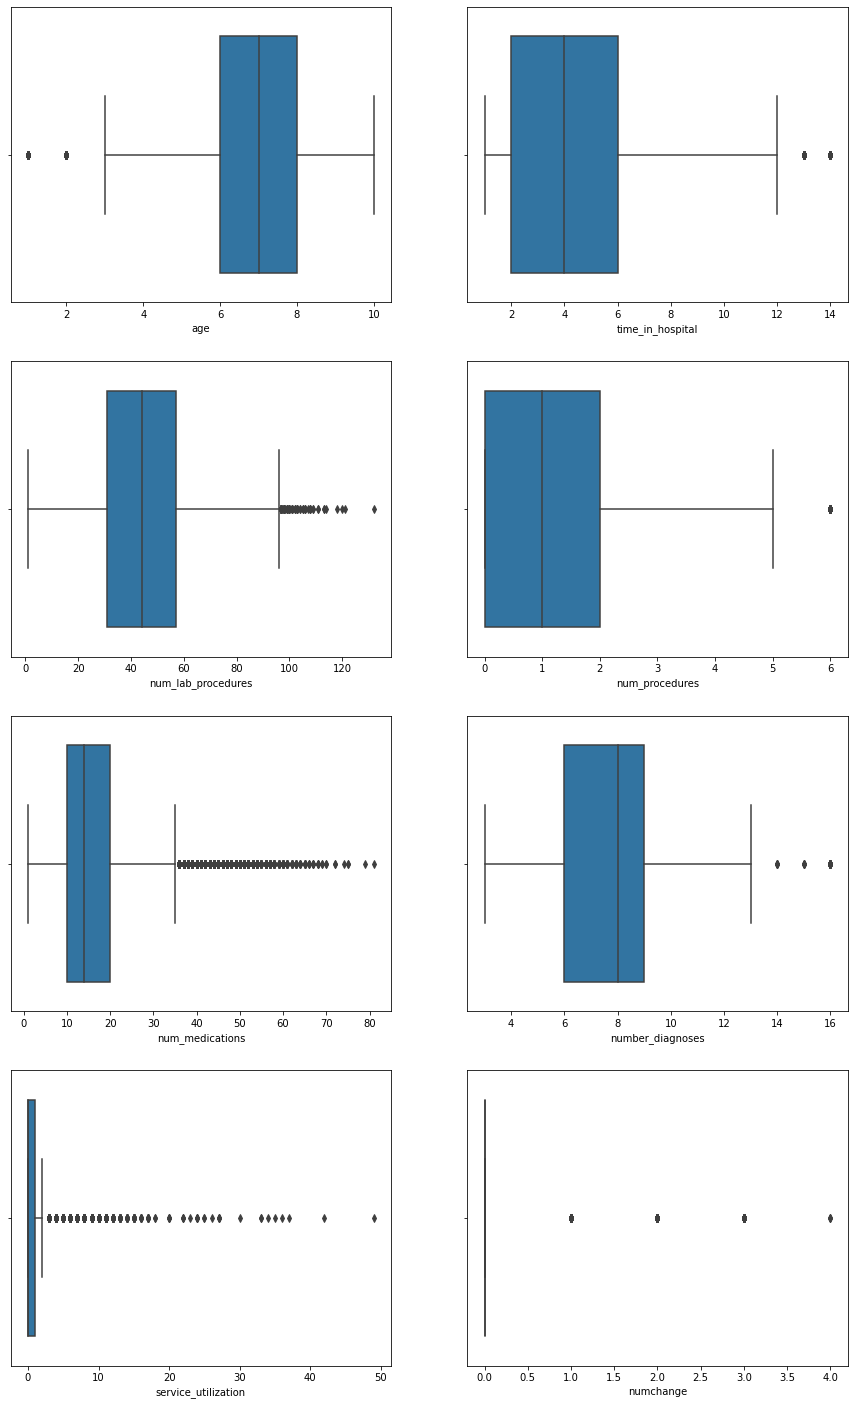

In [75]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,25))
for var, subplot in zip(df1_num_temp.columns, ax.flatten()):
    sns.boxplot(df1_num_temp[var], ax = subplot)
plt.show()


In [76]:
df1 = df1[~((df1 < (Q1 - 1.5*IQR))|(df1 > (Q3 + 1.5*IQR))).any(axis=1)]

In [77]:
df1.shape

(41658, 19)

In [78]:
df1.readmitted.value_counts(normalize=True)

0   0.917567
1   0.082433
Name: readmitted, dtype: float64

In [ ]:
#After removing outliers, target variable is found to be imbalanced.

# Visualisation

#### Univariate Analysis

#### Distribution of Readmission

Text(0.95, 3435, '8.24%')

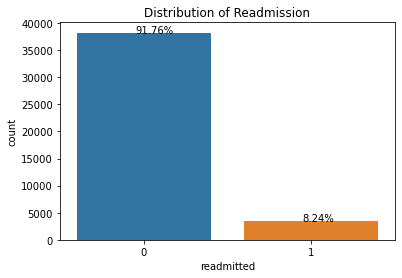

In [79]:
# Distribution of Readmission 
sns.countplot(df1['readmitted']).set_title('Distribution of Readmission')
plt.text(x = -0.05, y = df1['readmitted'].value_counts()[0] + 1, s = str(round((df1['readmitted'].value_counts()[0])*100/len(df1),2)) + '%')
plt.text(x = 0.95, y = df1['readmitted'].value_counts()[1] +1, s = str(round((df1['readmitted'].value_counts()[1])*100/len(df1),2)) + '%')

<AxesSubplot:xlabel='age', ylabel='count'>

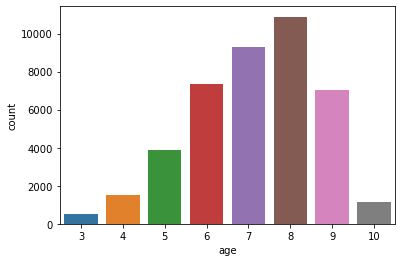

In [80]:
sns.countplot(df1['age'])

In [82]:
df1['num_procedures'].value_counts()

0    19283
1     8946
2     5649
3     4497
4     1785
5     1498
Name: num_procedures, dtype: int64

In [85]:
df1['num_procedures'] = df1['num_procedures'].astype(object)

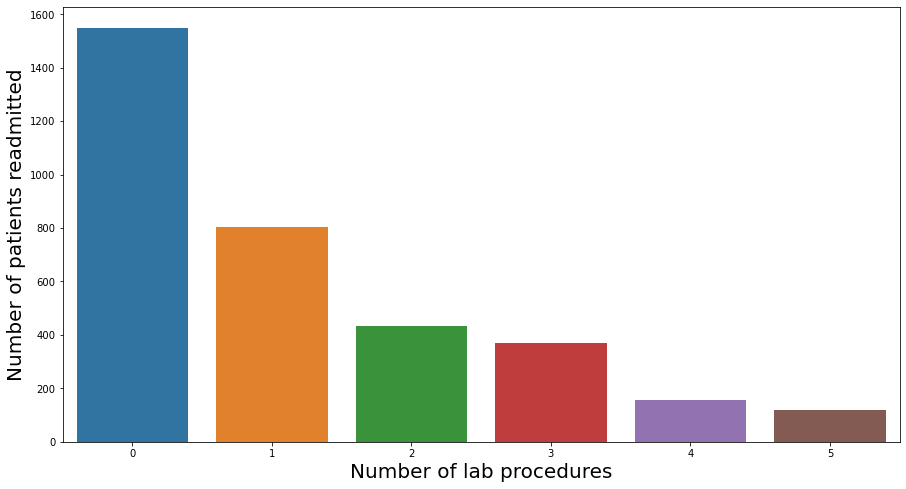

In [88]:
plt.rcParams["figure.figsize"] = [15,8]


ax = sns.countplot(data=df1, x=df1['num_procedures'][df1['readmitted']==1])

# set the label for y-axis
ax.set_ylabel('Number of patients readmitted', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Number of lab procedures', fontsize=20)

# display the plot
plt.show()



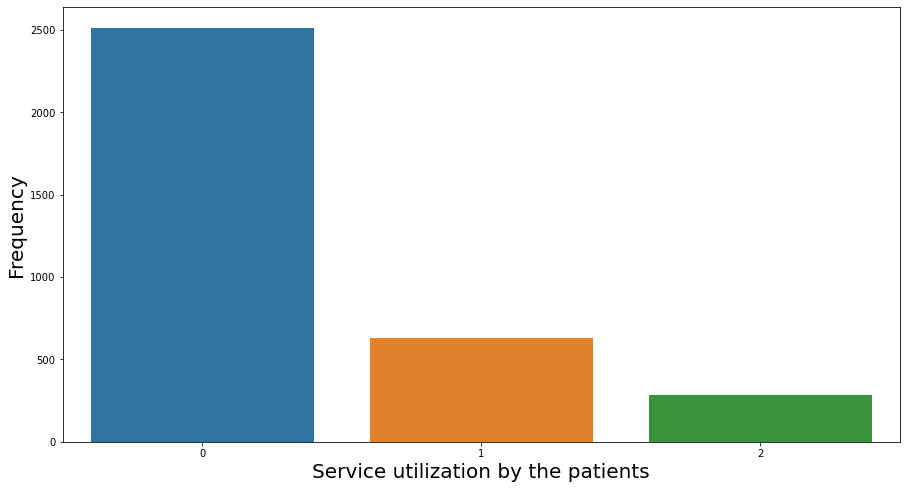

In [93]:
plt.rcParams["figure.figsize"] = [15,8]


ax = sns.countplot(data=df1, x=df1['service_utilization'][df1['readmitted']==1])

# set the label for y-axis
ax.set_ylabel('Frequency', fontsize=20)

# set the label for x-axis
ax.set_xlabel('Service utilization by the patients', fontsize=20)

# display the plot
plt.show()

Majority of patients admitted in hospitals belongs to age group 70-80. 

In [82]:
df1['age'].skew()

-0.42605553323274603

The Data of age feature is left skewed. log transformation is needed.

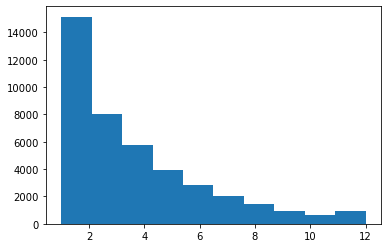

In [83]:
plt.hist(df1['time_in_hospital'], bins=10)
plt.show()

In [84]:
df1['time_in_hospital'].skew()

1.1112255955301071

Data of time spent in hospitals by the patients is highly right skewed.

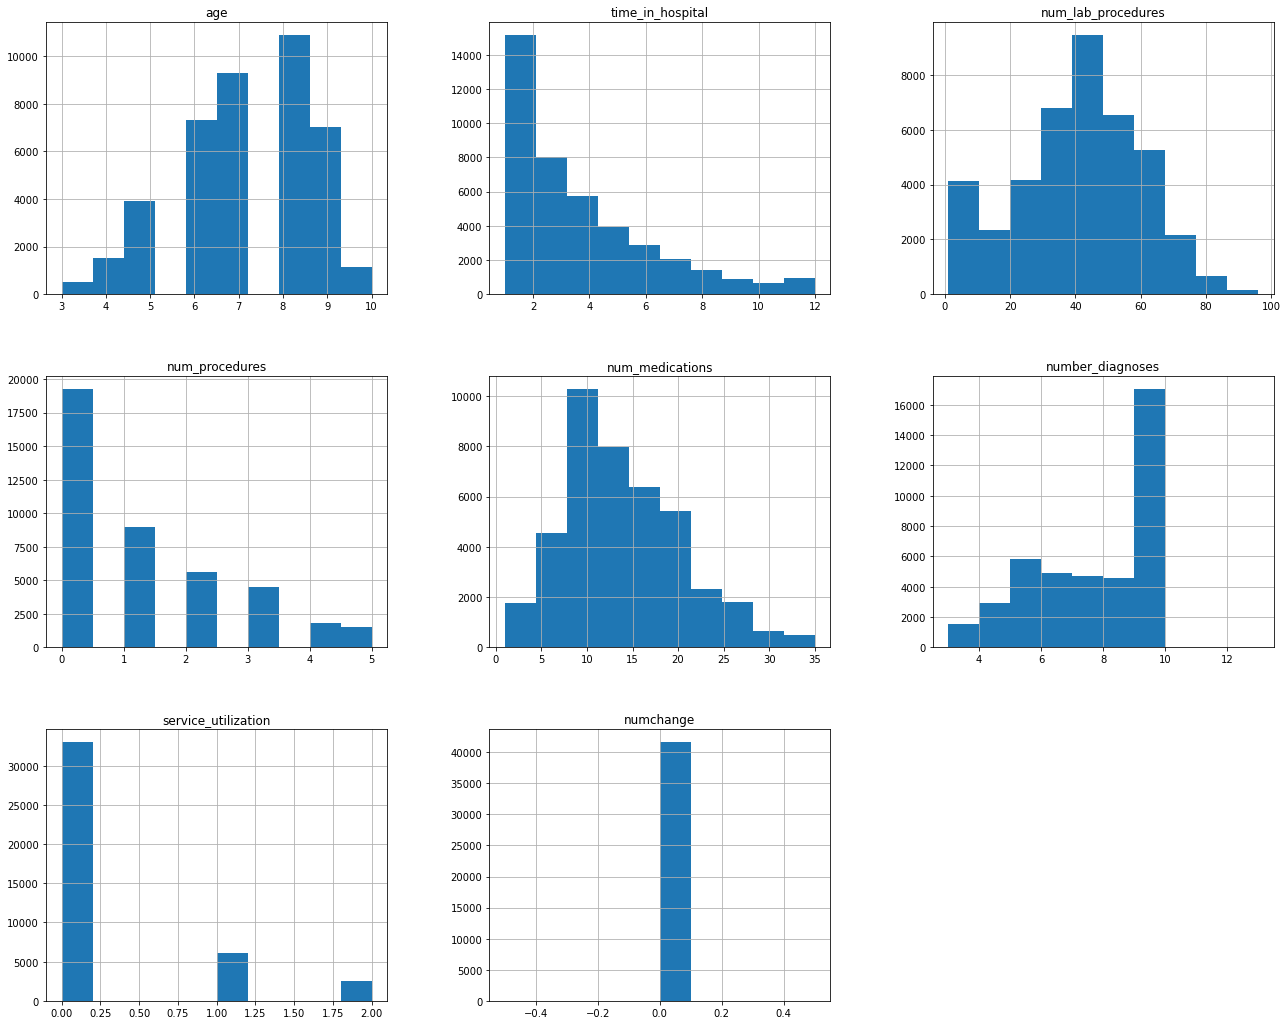

In [85]:
plt.rcParams['figure.figsize'] = [22,18]
df_n=df1.select_dtypes(include=np.number)
df_n.hist()
plt.show()

#### Time in Hospital and Readmission

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

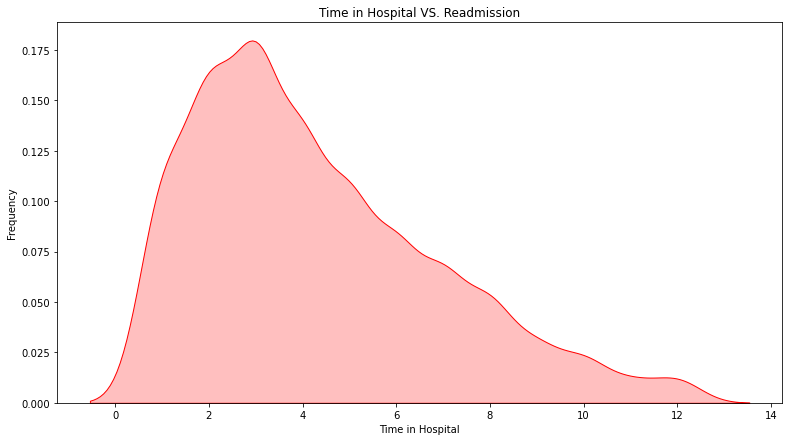

In [94]:
fig = plt.figure(figsize=(13,7),)

ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

The frequency of number of days spent in hospital is nearly same for both class of patients i.e., readmitted and not readmitted.

#### Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

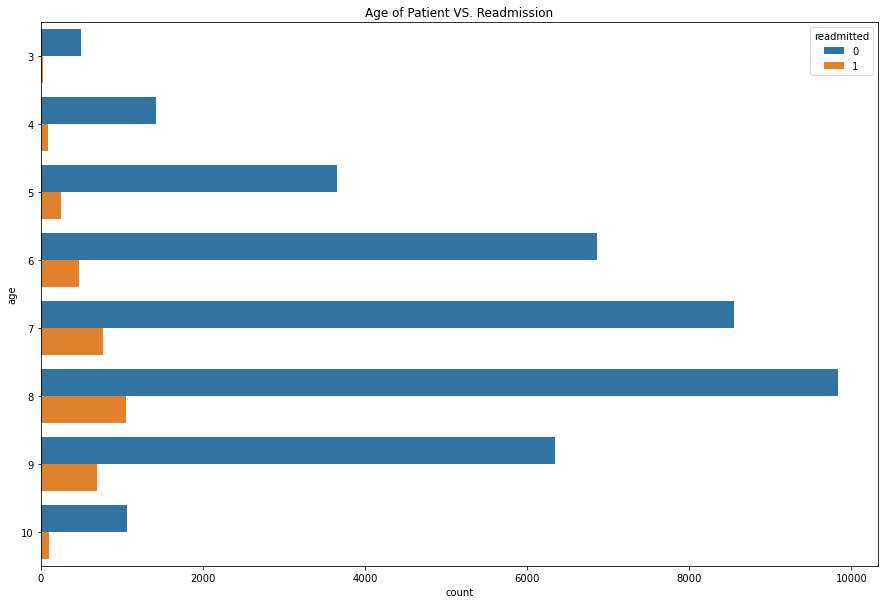

In [87]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df1['age'], hue = df1['readmitted']).set_title('Age of Patient VS. Readmission')

The maximun of patients readmitted into hospital belongs to age group of (70-80). \
The count of patients that are readmitted is very low for the patients having age less than 40.

#### Ethnicity of patient and Readmission

<AxesSubplot:xlabel='count', ylabel='race'>

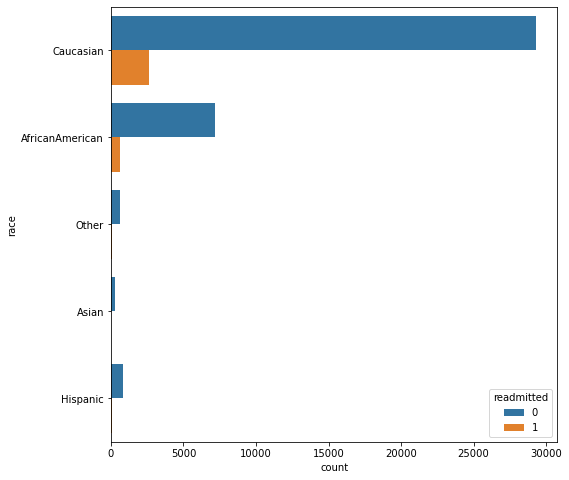

In [88]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df1['race'], hue = df1['readmitted'])

In [89]:
df1['race'][df1['readmitted']==1].value_counts(normalize = True)

Caucasian         0.768783
AfricanAmerican   0.190740
Hispanic          0.021549
Other             0.011357
Asian             0.007571
Name: race, dtype: float64

Majority of the patients readmitted into hospital belongs to the race caucasian. \
The count of patients belonging to the race Asian, Hispanic and other is negligible in comparison with patients of caucasian race.

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

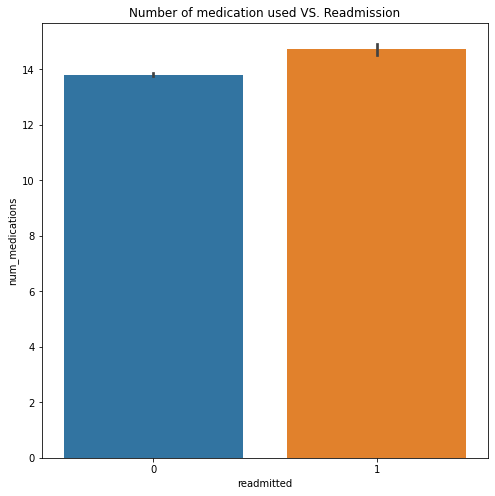

In [90]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df1['readmitted'], y = df1['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'number of generic medications VS. Readmission')

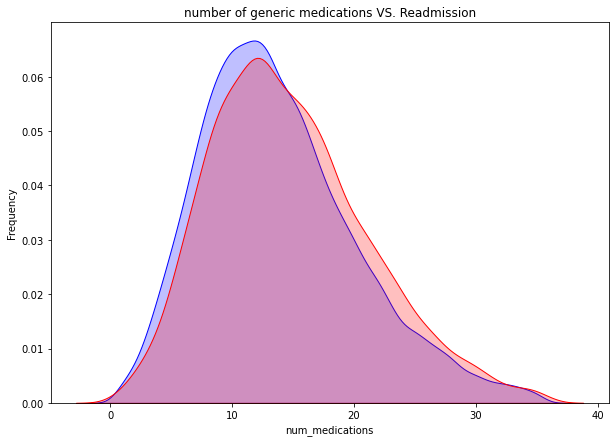

In [91]:
fig = plt.figure(figsize=(10,7),)
ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 0),'num_medications'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df1.loc[(df1['readmitted'] == 1),'num_medications'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='num_medications', ylabel='Frequency')
plt.title('number of generic medications VS. Readmission')

The number of medications prescribed to the patients readmitted and not readmitted are almost similar. Hence, sevearity of patients' illness does not affect the chances of readmission into the hospital.

#### Gender and Readmission
* Male = 1
* Female = 0

Text(0.5, 1.0, 'Gender of Patient VS. Readmission')

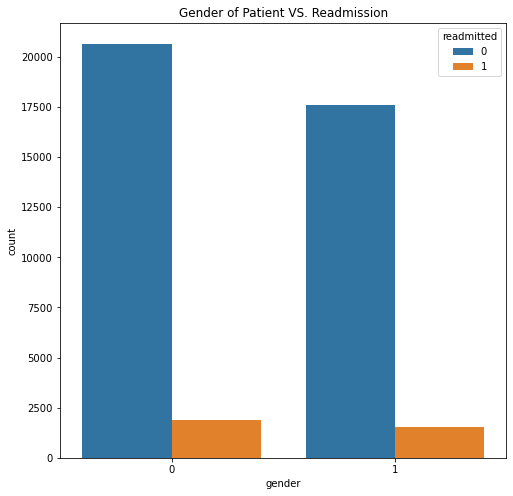

In [92]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['gender'], hue = df1['readmitted']).set_title("Gender of Patient VS. Readmission")

In [93]:
df1['gender'].value_counts(normalize=True)

0   0.541121
1   0.458879
Name: gender, dtype: float64

From the graph and percentage obtained, it is found that gender feature has slight influence on the chances of readmitting into the hospital.

#### Change of Medication and Readmission
* Change = 1
* No Change = 0

Text(0.5, 1.0, 'Change of Medication VS. Readmission')

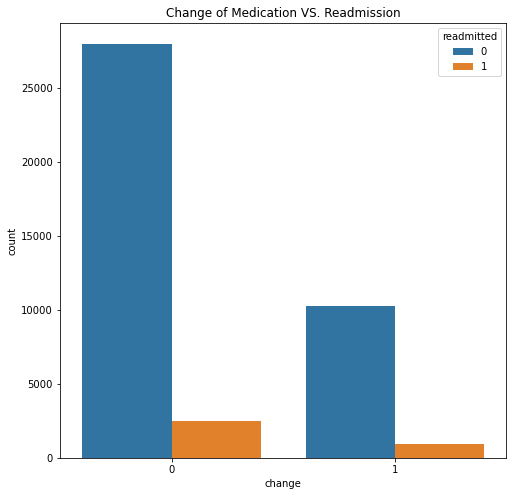

In [94]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['change'], hue = df1['readmitted']).set_title('Change of Medication VS. Readmission')

In [95]:
df1['change'].value_counts(normalize=True)

0   0.731576
1   0.268424
Name: change, dtype: float64

From the graph and percentage obtained, it is found that changing the medications reduces the chances of readmitting into the hospital slightly.

#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

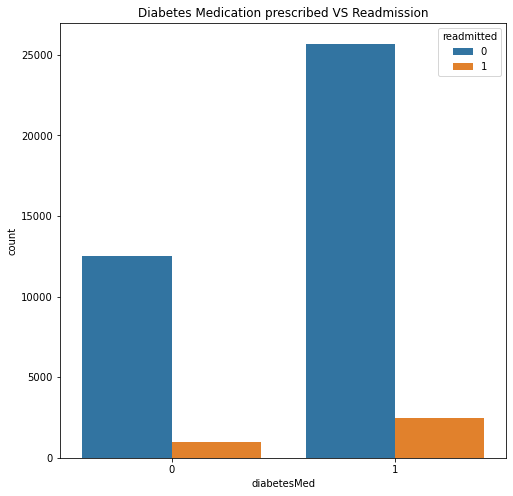

In [96]:
fig = plt.figure(figsize=(8,8))
sns.countplot(df1['diabetesMed'], hue = df1['readmitted']).set_title('Diabetes Medication prescribed VS Readmission')


In [97]:
df1['diabetesMed'].value_counts(normalize=True)

1   0.675813
0   0.324187
Name: diabetesMed, dtype: float64

Almost 76 percent of the patients that were readmitted were diabetic patients precribed with diabetic medicines.

#### Service Utilization and Readmission

Text(0.5, 1.0, 'Service Utilization VS. Readmission')

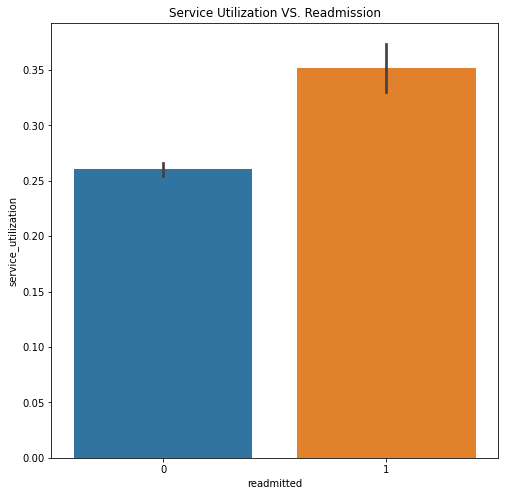

In [89]:
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df1['service_utilization'], x = df1['readmitted']).set_title('Service Utilization VS. Readmission')

From the past history of the patients, more than 80 percent of the patients have visited and admitted before in the hospitals. \
These patients who have utilised the medical facilities provided by hospitals are highly suceptible for readmittance in hospitals. 

#### Glucose serum test result and Readmission
*Glucose Serum test* - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

* '>200 and >300 : 1 = indicates diabetes
* 'Norm' : 0 = Normal
* 'None' : 2 = test was not taken

Text(0.5, 1.0, 'Glucose test serum test result VS. readmission')

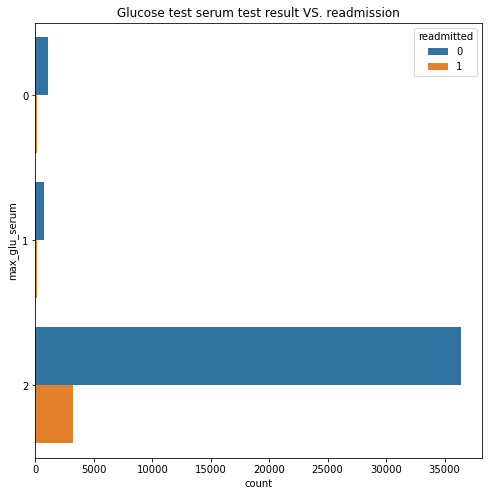

In [99]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df1['max_glu_serum'], hue = df1['readmitted']).set_title('Glucose test serum test result VS. readmission')

In [100]:
df1['max_glu_serum'].value_counts(normalize=True)

2   0.950982
0   0.028638
1   0.020380
Name: max_glu_serum, dtype: float64

No significant effect of glucose serum test result is observed on readmission of patients in hospitals.

#### A1C result and Readmission


*A1C test* - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.
*  '>7'   :  1   
*  '>8'   :  1   
*    Norm :  0  = Normal 
*    None : 2 = Test was not taken

Text(0.5, 1.0, 'A1C test result VS. Readmission')

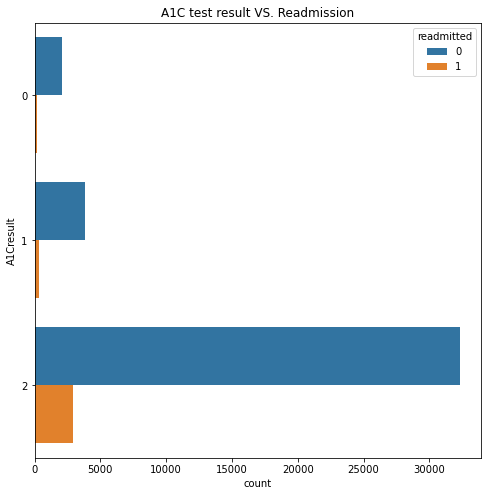

In [101]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y= df1['A1Cresult'], hue = df1['readmitted']).set_title('A1C test result VS. Readmission')

In [102]:
df1['A1Cresult'].value_counts(normalize=True)

2   0.845312
1   0.099861
0   0.054827
Name: A1Cresult, dtype: float64

A1C test shows a very significant effect on hospital readmittance of patients.

Hence, A1C test is more likely to be the reliable test to predict the chances of readmittance of diabetic patients in hospital.

# Feature Transformation

In [103]:
df2=df1.copy()

In [104]:
df2.dtypes

race                        object
gender                      object
age                          int64
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
service_utilization          int64
numchange                    int64
level1_diag1                object
dtype: object

In [105]:
#Separating target variable 
df_target= df2['readmitted']
df_target

4         0
6         0
7         0
9         0
10        0
13        0
14        0
16        1
17        0
18        0
22        0
23        0
24        0
25        0
26        0
27        0
29        0
32        0
33        0
36        0
37        0
38        0
39        0
41        0
43        0
45        0
49        0
50        1
51        0
52        0
56        0
60        0
63        0
67        0
68        1
69        0
70        1
72        0
75        0
76        0
80        0
85        0
89        0
90        0
91        0
92        0
93        0
94        0
95        0
96        0
102       0
103       0
105       0
107       0
108       0
109       0
112       0
113       0
115       0
116       1
121       0
122       0
124       0
125       0
126       0
129       0
131       0
134       0
139       0
142       0
144       0
145       0
146       0
148       0
150       0
153       0
154       0
156       0
157       0
158       0
159       0
160       1
161       0
162 

In [106]:
df3 = df2.drop(['readmitted'] , axis =1)


In [107]:
df3.shape

(41658, 18)

In [108]:
df_cat = df3.select_dtypes(include=[np.object])
df_num = df3.select_dtypes(include=[np.number])

In [109]:
df_cat.columns

Index(['race', 'gender', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'max_glu_serum', 'A1Cresult', 'change',
       'diabetesMed', 'level1_diag1'],
      dtype='object')

In [110]:
df_num.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'service_utilization',
       'numchange'],
      dtype='object')

In [111]:
df_cat.shape

(41658, 10)

In [112]:
df_num.shape

(41658, 8)

In [113]:
num_col = list(df_num.columns)
num_col

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_diagnoses',
 'service_utilization',
 'numchange']

Checking skewness and kurtosis of numerical columns


In [114]:
# Removing skewnewss and kurtosis using log transformation if it is above a threshold value -  2

statdataframe = pd.DataFrame()
statdataframe['numeric_column'] = num_col
skew_before = []
skew_after = []

kurt_before = []
kurt_after = []

standard_deviation_before = []
standard_deviation_after = []

log_transform_needed = []

log_type = []

for i in num_col:
    skewval = df_num[i].skew()
    skew_before.append(skewval)
    
    kurtval = df_num[i].kurtosis()
    kurt_before.append(kurtval)
    
    sdval = df_num[i].std()
    standard_deviation_before.append(sdval)
    
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')
        log_type.append('log1p')
        df_num[i + "_log1p"] = np.log1p(df_num[i])
        skewvalnew = np.log1p(df_num[i + "_log1p"]).skew()
        skew_after.append(skewvalnew)
        
        kurtvalnew = np.log1p(df_num[i + "_log1p"]).kurtosis()
        kurt_after.append(kurtvalnew)
        sdvalnew = np.log1p(df_num[i + "_log1p"]).std()
        standard_deviation_after.append(sdvalnew)
            
    else:
        log_type.append('NA')
        log_transform_needed.append('No')
        
        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

In [115]:
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.426056,-0.283309,1.496524,No,NA,-0.426056,-0.283309,1.496524
1,time_in_hospital,1.111226,0.873839,2.478141,No,NA,1.111226,0.873839,2.478141
2,num_lab_procedures,-0.245691,-0.391595,19.329802,No,NA,-0.245691,-0.391595,19.329802
3,num_procedures,1.103812,0.297701,1.401931,No,NA,1.103812,0.297701,1.401931
4,num_medications,0.655101,0.227517,6.413036,No,NA,0.655101,0.227517,6.413036
5,number_diagnoses,-0.571797,-0.988875,1.908845,No,NA,-0.571797,-0.988875,1.908845
6,service_utilization,2.001695,2.885287,0.563727,Yes,log1p,1.581565,0.741867,0.242983
7,numchange,0.000000,0.000000,0.000000,No,NA,0.000000,0.000000,0.000000


In [116]:
df_cat.shape

(41658, 10)

In [117]:
#Since log transformed feature of service utilisation is created, the original feature is dropped.
df_num = df_num.drop('service_utilization', axis =1)

In [118]:
df_num.columns

Index(['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_diagnoses', 'numchange',
       'service_utilization_log1p'],
      dtype='object')

In [119]:
df_num.describe()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,numchange,service_utilization_log1p
count,41658.000000,41658.000000,41658.000000,41658.000000,41658.000000,41658.000000,41658.000000,41658.000000
mean,7.160833,3.793365,40.694056,1.161001,13.881967,7.170700,0.000000,0.168028
std,1.496524,2.478141,19.329802,1.401931,6.413036,1.908845,0.000000,0.339640
min,3.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000
25%,6.000000,2.000000,29.000000,0.000000,9.000000,6.000000,0.000000,0.000000
50%,7.000000,3.000000,42.000000,1.000000,13.000000,8.000000,0.000000,0.000000
75%,8.000000,5.000000,54.000000,2.000000,18.000000,9.000000,0.000000,0.000000
max,10.000000,12.000000,96.000000,5.000000,35.000000,13.000000,0.000000,1.098612


In [120]:
df_num=df_num.drop('numchange', axis=1)

#### Standardising numerical variables

In [121]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# instantiate the standardscaler
standard_scale = StandardScaler()

# fit the StandardScaler
for i in df_num.columns:
    df_num[i] = standard_scale.fit_transform(df_num[[i]])

In [122]:
df_num.shape

(41658, 7)

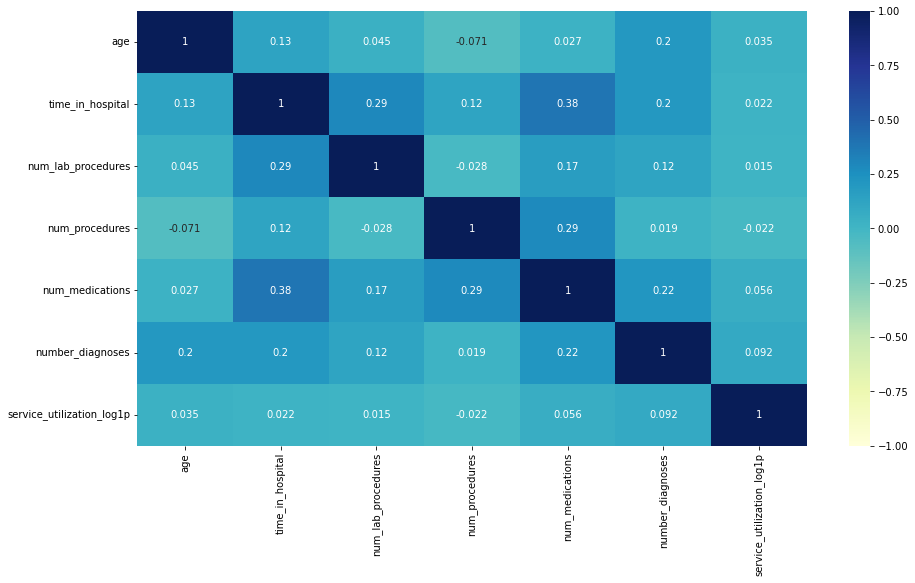

In [123]:
plt.rcParams["figure.figsize"] = [15,8]
sns.heatmap(df_num.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

In [124]:

df_pd = pd.get_dummies(data = df_cat, drop_first = True)


In [125]:
df_pd.head()

,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_25,admission_source_id_2,admission_source_id_4,admission_source_id_6,admission_source_id_7,admission_source_id_17,max_glu_serum_1,max_glu_serum_2,A1Cresult_1,A1Cresult_2,change_1,diabetesMed_1,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1
6,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0


#### Concatenate numerical and  categorical variables

In [126]:
X = pd.concat([df_num, df_pd], axis = 1)

In [127]:
X = X.reset_index()

In [128]:
X.head()

,index,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization_log1p,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_1,admission_type_id_2,admission_type_id_3,admission_type_id_5,admission_type_id_6,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_18,discharge_disposition_id_22,discharge_disposition_id_25,admission_source_id_2,admission_source_id_4,admission_source_id_6,admission_source_id_7,admission_source_id_17,max_glu_serum_1,max_glu_serum_2,A1Cresult_1,A1Cresult_2,change_1,diabetesMed_1,level1_diag1_1.0,level1_diag1_2.0,level1_diag1_3.0,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0
0,4,-1.443918,-1.127215,0.533170,-0.828154,-0.917200,-1.137193,-0.494731,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1
1,6,-0.107473,0.083384,1.516120,-0.114844,1.109945,-0.089427,-0.494731,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0
2,7,0.560750,0.486917,1.671322,-0.828154,-0.293463,0.434457,-0.494731,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0
3,9,1.897196,3.311649,-0.398046,1.311776,0.642142,0.434457,-0.494731,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0
4,10,-1.443918,2.101050,0.326233,0.598466,0.486208,0.958340,-0.494731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0


In [129]:
Total = X.isnull().sum().sort_values(ascending=False)
Total

index                          0
A1Cresult_2                    0
admission_source_id_2          0
admission_source_id_4          0
admission_source_id_6          0
admission_source_id_7          0
admission_source_id_17         0
max_glu_serum_1                0
max_glu_serum_2                0
A1Cresult_1                    0
change_1                       0
discharge_disposition_id_22    0
diabetesMed_1                  0
level1_diag1_1.0               0
level1_diag1_2.0               0
level1_diag1_3.0               0
level1_diag1_4.0               0
level1_diag1_5.0               0
level1_diag1_6.0               0
level1_diag1_7.0               0
discharge_disposition_id_25    0
discharge_disposition_id_18    0
age                            0
race_Hispanic                  0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_diagnoses               0
service_utilization_log1p      0
race_Asian

In [130]:
df_target = df_target.astype(int)

In [131]:
df_target.value_counts(normalize=True)

0   0.917567
1   0.082433
Name: readmitted, dtype: float64

In [132]:
y = df_target


# SMOTE TO REDUCE IMBALANCE IN DATASET

In [ ]:
pip install imblearn

In [133]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)



Counter({0: 38224, 1: 3434})
Counter({0: 38224, 1: 38224})


In [134]:
X.shape

(76448, 43)

In [135]:
y.shape

(76448,)

# Logistic Regression Full Model

In [136]:
import statsmodels
import statsmodels.api as sm
X = sm.add_constant(X)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

X_train_full (61158, 44)
y_train_full (61158,)
X_test_full (15290, 44)
y_test_full (15290,)


In [137]:
# build the model on train data (X_train and y_train)
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.312908
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                61158
Model:                          Logit   Df Residuals:                    61114
Method:                           MLE   Df Model:                           43
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5486
Time:                        16:23:24   Log-Likelihood:                -19137.
converged:                       True   LL-Null:                       -42391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           7.3348      0.104     70.595      0.000   

In [ ]:
#Macfadden R2 value of full model is found to be 0.5492.
#LLR p-value less than 0.05 indicate that model is significant.
#Significant difference between log likelyhood of null model and full model is observed.
#It also indicates scope for the further improvement in base model.
#Surprisingly, all the features are found to be significant.

In [138]:
logreg_full.llr_pvalue

0.0

the LLR-p-value is less than 0.05 Hence the overall model is significant.

In [139]:
# Mcfadden R2 1- llf/llr
mcf_r2=1-(logreg_full.llf/logreg_full.llnull)    # both values from model.summary()
mcf_r2

0.5485679200157864

The value is very far away from 1. Hence, it is required to drop insignificant features.

In [140]:
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds'])
df_odds.sort_values('Odds' , ascending=False)

,Odds
const,1532.724952
age,1.486516
discharge_disposition_id_22,1.429717
num_medications,1.344444
service_utilization_log1p,1.166558
number_diagnoses,1.114142
num_procedures,1.091780
time_in_hospital,1.047997
index,0.999992
num_lab_procedures,0.927212


In [ ]:
#likelyhood of Age is found to be the highest.
#It indicates strong relationship of Age and hospital readmission of patient.
#After the 'Age' feature, 'discharge_disposition_id_22' is found to be more significant. 
# It corresponds to a category of patient who were discharged to home after certain period of follow-up care provided by hospital.

In [141]:
print('AIC:', logreg_full.aic)

AIC: 38361.71213321431


In [163]:
y_pred_prob = logreg_full.predict(X_train_full)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
table_full_train = classification_report(y_train_full, y_pred)

# print the table
print(table_full_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_full, y_pred)
print('kappa value:',kappa)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     30538
           1       0.89      0.87      0.88     30620

    accuracy                           0.88     61158
   macro avg       0.88      0.88      0.88     61158
weighted avg       0.88      0.88      0.88     61158

kappa value: 0.7620012785207008


In [150]:
print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_full, y_pred_prob),4))


AUC Score for train dataset: 0.9361


In [164]:

y_pred_prob = logreg_full.predict(X_test_full)
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# create a confusion matrix
cm = confusion_matrix(y_test_full, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8822105951602355


In [165]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred)
print('kappa value:',kappa)

kappa value: 0.7643884644944591


In [153]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# import the functions for visualizing the decision tree
from IPython.display import Image  

import random

In [166]:
table_full = classification_report(y_test_full, y_pred)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      7686
           1       0.89      0.87      0.88      7604

    accuracy                           0.88     15290
   macro avg       0.88      0.88      0.88     15290
weighted avg       0.88      0.88      0.88     15290



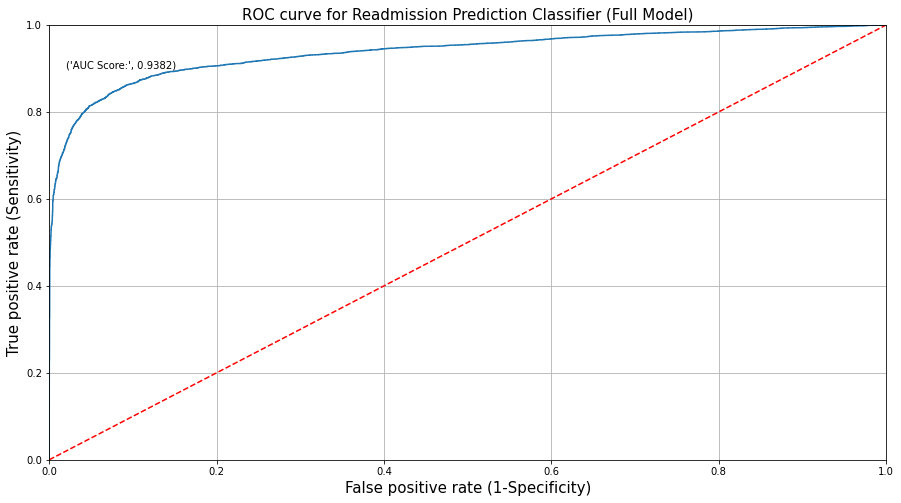

In [167]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Readmission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_pred_prob),4)))
                        
plt.grid(True)

Identifying best cut-off by yoden's index

In [168]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head(10)

,TPR,FPR,Threshold,Difference
0,0.846397,0.076503,0.588133,0.769894
1,0.846265,0.076373,0.588649,0.769892
2,0.846791,0.077023,0.586742,0.769768
3,0.846660,0.076893,0.586980,0.769767
4,0.846265,0.076503,0.588420,0.769762
5,0.844687,0.074941,0.592123,0.769746
6,0.844555,0.074811,0.592256,0.769744
7,0.844424,0.074681,0.592714,0.769743
8,0.844292,0.074551,0.593109,0.769741
9,0.846660,0.077023,0.586847,0.769636


In [169]:
y_pred_youden = [ 0 if x < 0.5881 else 1 for x in y_pred_prob]

In [170]:
y_pred_prob = logreg_full.predict(X_train_full)
ypred_y_train = [ 0 if x < 0.5881 else 1 for x in y_pred_prob]
table_full_train = classification_report(y_train_full, ypred_y_train)

# print the table
print(table_full_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_full, ypred_y_train)
print('kappa value:',kappa)

print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_full, ypred_y_train),4))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     30538
           1       0.92      0.84      0.88     30620

    accuracy                           0.88     61158
   macro avg       0.89      0.88      0.88     61158
weighted avg       0.89      0.88      0.88     61158

kappa value: 0.7653546936295412
AUC Score for train dataset: 0.8827


In [171]:
acc_table = classification_report(y_test_full, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      7686
           1       0.92      0.85      0.88      7604

    accuracy                           0.89     15290
   macro avg       0.89      0.88      0.88     15290
weighted avg       0.89      0.89      0.88     15290



In [172]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.7702072852292217


In [ ]:
#Minor increment in cohen kappa score is observed after implementing optimum threashold value.

# Logistic regression Fitted model: Feature Selection

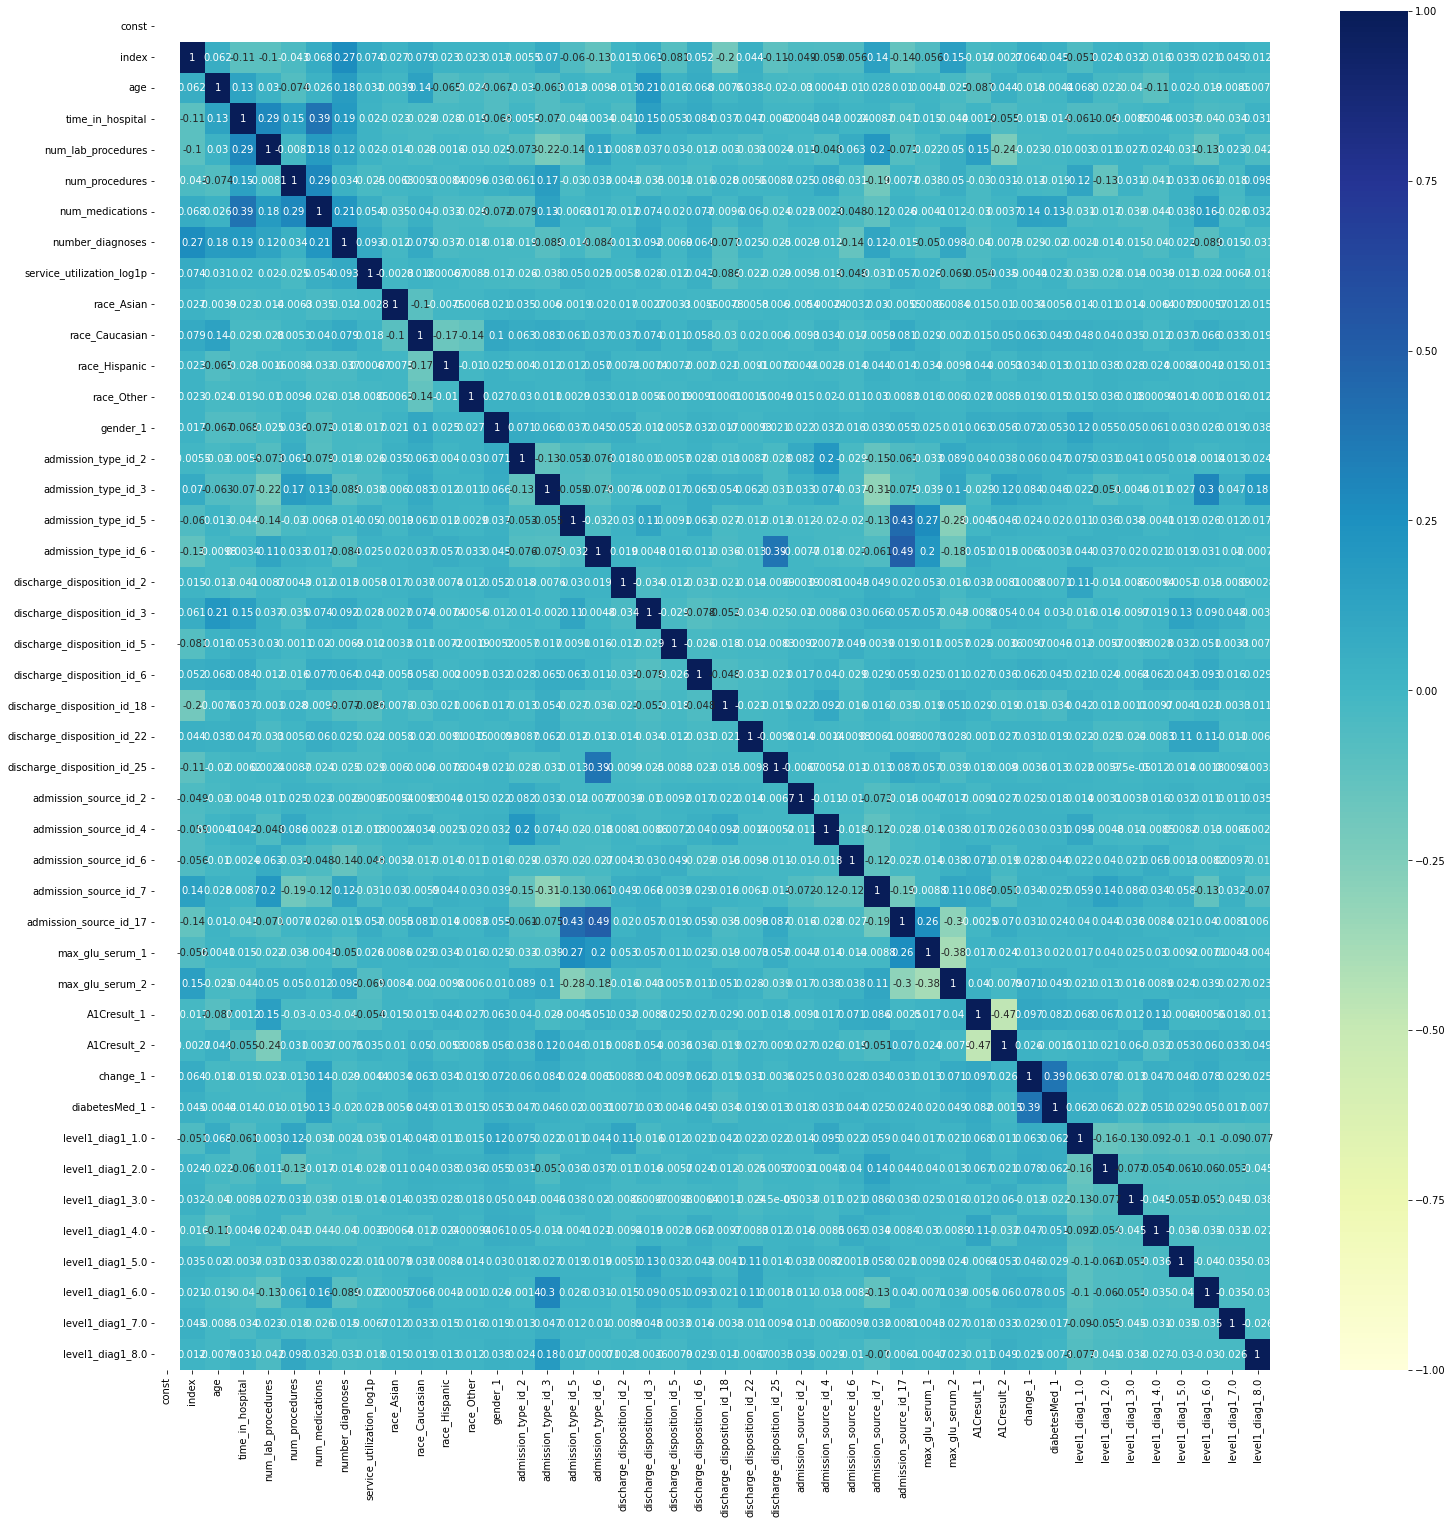

In [173]:
plt.rcParams["figure.figsize"] = [25,25]
sns.heatmap(X_train_full.corr(), annot = True, cmap = 'YlGnBu', vmin=-1, vmax=1)
plt.show()

In [ ]:
#Time spent in hospital and number of medications are found to be co-related.
#Max_glu_serum_2 and A1Cresult_2 are found to be co-related.
#Hence, time spent in hospital, max_glu_serum_2 is dropped in fitted model.

In [175]:
X_train_fitted = X_train_full.copy()

In [176]:
X_train_fitted.columns

Index(['const', 'index', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses',
       'service_utilization_log1p', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_type_id_5', 'admission_type_id_6',
       'discharge_disposition_id_2', 'discharge_disposition_id_3',
       'discharge_disposition_id_5', 'discharge_disposition_id_6',
       'discharge_disposition_id_18', 'discharge_disposition_id_22',
       'discharge_disposition_id_25', 'admission_source_id_2',
       'admission_source_id_4', 'admission_source_id_6',
       'admission_source_id_7', 'admission_source_id_17', 'max_glu_serum_1',
       'max_glu_serum_2', 'A1Cresult_1', 'A1Cresult_2', 'change_1',
       'diabetesMed_1', 'level1_diag1_1.0', 'level1_diag1_2.0',
       'level1_diag1_3.0', 'level1_diag1_4.0', 'level1_diag1_5.0',
       'level1_diag1_6.0', 'level1_diag1_7.0',

In [177]:
for ind in range(len(X_train_full.columns)):
    vif=pd.DataFrame()
    vif["VIF_Factor"]=[variance_inflation_factor(X_train_full.values,i) for i in range(X_train_full.shape[1])]
    vif["Features"]=X_train_full.columns
    multi=vif[vif['VIF_Factor']>5]
    
multi

,VIF_Factor,Features
0,27.024768,const


In [ ]:
# None of the features are found to be having VIF factor grater than 5.

In [178]:
X_train_fitted = X_train_fitted.drop(['time_in_hospital','max_glu_serum_2'], axis=1)
X_test_fitted = X_test_full.copy()
X_test_fitted = X_test_fitted.drop(['time_in_hospital','max_glu_serum_2'], axis=1)

In [179]:
y_train_fitted = y_train_full
y_test_fitted = y_test_full

In [180]:
logreg_fitted = sm.Logit(y_train_fitted, X_train_fitted).fit()

# print the summary of the model
print(logreg_fitted.summary())

Optimization terminated successfully.
         Current function value: 0.315721
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                61158
Model:                          Logit   Df Residuals:                    61116
Method:                           MLE   Df Model:                           41
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.5445
Time:                        16:48:29   Log-Likelihood:                -19309.
converged:                       True   LL-Null:                       -42391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           6.1220      0.067     90.810      0.000   

In [181]:
mcf_r2=1-(logreg_fitted.llf/logreg_fitted.llnull)    
mcf_r2

0.5445097461041839

In [ ]:
# R2 value is reduced from full model which indicates that 
#the features dropped to remove multicollinearity were significant.

In [182]:
y_pred_prob_t = logreg_fitted.predict(X_train_fitted)
y_pred_t = [ 0 if x < 0.5 else 1 for x in y_pred_prob_t]
table_fitted_train = classification_report(y_train_full, y_pred_t)

# print the table
print(table_fitted_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_fitted, y_pred_t)
print('kappa value:',kappa)

print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_fitted, y_pred_prob_t),4))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     30538
           1       0.89      0.87      0.88     30620

    accuracy                           0.88     61158
   macro avg       0.88      0.88      0.88     61158
weighted avg       0.88      0.88      0.88     61158

kappa value: 0.7601372202629986
AUC Score for train dataset: 0.9353


In [183]:
y_pred_prob = logreg_fitted.predict(X_test_fitted)
y_pred_fitted = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [184]:
cm = confusion_matrix(y_test_fitted, y_pred_fitted)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8807717462393722


In [185]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_fitted, y_pred_fitted)
print('kappa value:',kappa)

kappa value: 0.761510032243671


In [186]:

table_fitted = classification_report(y_test_fitted, y_pred_fitted)

# print the table
print(table_fitted)


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7686
           1       0.89      0.87      0.88      7604

    accuracy                           0.88     15290
   macro avg       0.88      0.88      0.88     15290
weighted avg       0.88      0.88      0.88     15290



# Logistic regression RFE Model (Recurssive Feature elimination)

In [188]:
y_train_rfe = y_train_full
y_test_rfe = y_test_full

In [192]:
#For RFE, we have to exclude constant feature from the full model.
X_train_rfe = X_train_full.iloc[:,1:]
X_test_rfe = X_train_full.iloc[:,1:]

logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select=10)

rfe_model = rfe_model.fit(X_train_rfe, y_train_rfe)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)


signi_feat_rfe = feat_index[feat_index==1].index

print(signi_feat_rfe)

Index(['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0'],
      dtype='object')


In [195]:
logreg_rfe = sm.Logit(y_train_rfe, X_train_full[['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.614784
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             readmitted   No. Observations:                61158
Model:                          Logit   Df Residuals:                    61148
Method:                           MLE   Df Model:                            9
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.1131
Time:                        16:53:54   Log-Likelihood:                -37599.
converged:                       True   LL-Null:                       -42391.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
age                           0.2311      0.010     22.881      0.000       0.

In [190]:
logreg_rfe.llr_pvalue

0.0

In [197]:
y_pred_prob_t = logreg_rfe.predict(X_train_full[['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0']])
y_pred_t = [ 0 if x < 0.5 else 1 for x in y_pred_prob_t]
table_rfe_train = classification_report(y_train_rfe, y_pred_t)

# print the table
print(table_rfe_train)

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_train_rfe, y_pred_t)
print('kappa value:',kappa)

print('AUC Score for train dataset:', round(metrics.roc_auc_score(y_train_rfe, y_pred_prob_t),4))

              precision    recall  f1-score   support

           0       0.59      0.87      0.71     30538
           1       0.76      0.40      0.52     30620

    accuracy                           0.63     61158
   macro avg       0.68      0.64      0.61     61158
weighted avg       0.68      0.63      0.61     61158

kappa value: 0.26999901699763673
AUC Score for train dataset: 0.773


In [198]:
y_pred_prob = logreg_rfe.predict(X_test_full[['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0']])
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

# create a confusion matrix
cm = confusion_matrix(y_test_full, y_pred)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.6411379986919555


In [199]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred)
print('kappa value:',kappa)

kappa value: 0.2804710078621895


In [200]:
table_full = classification_report(y_test_full, y_pred)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      7686
           1       0.76      0.41      0.53      7604

    accuracy                           0.64     15290
   macro avg       0.68      0.64      0.62     15290
weighted avg       0.68      0.64      0.62     15290



In [201]:
print('AIC:', logreg_rfe.aic)

AIC: 75217.86625474658


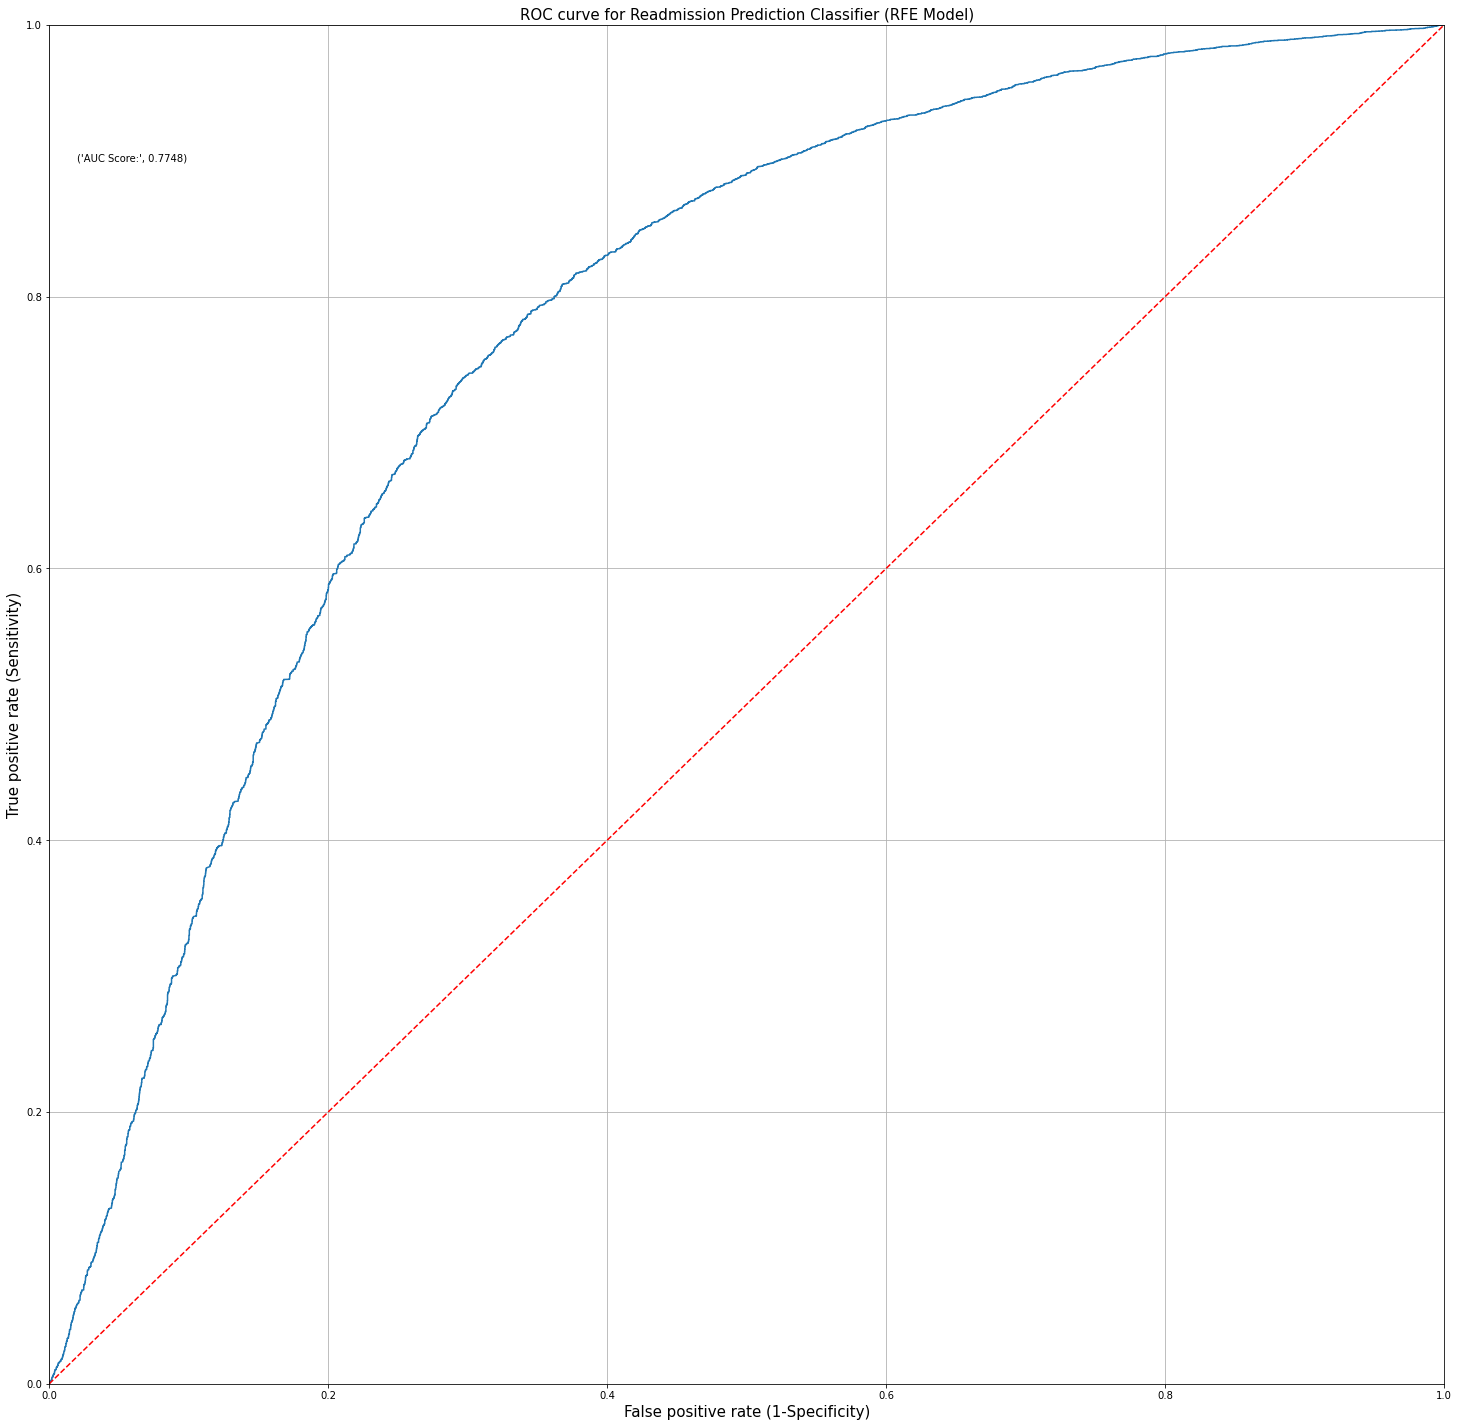

In [202]:
fpr, tpr, thresholds = roc_curve(y_test_full, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Readmission Prediction Classifier (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test_full, y_pred_prob),4)))
                        
plt.grid(True)

In [203]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

youdens_table.head(10)

,TPR,FPR,Threshold,Difference
0,0.786954,0.343091,0.371467,0.443863
1,0.789584,0.345824,0.370072,0.443761
2,0.789321,0.345563,0.370197,0.443758
3,0.789190,0.345433,0.370281,0.443757
4,0.787086,0.343352,0.371160,0.443734
5,0.786560,0.342831,0.371632,0.443729
6,0.783272,0.339578,0.373204,0.443694
7,0.783009,0.339318,0.373370,0.443691
8,0.789847,0.346214,0.369786,0.443634
9,0.789190,0.345563,0.370211,0.443627


In [204]:
y_pred_youden = [ 0 if x < 0.371 else 1 for x in y_pred_prob]

In [207]:
y_pred_prob = logreg_rfe.predict(X_test_full[['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0']])
y_pred_youden = [ 0 if x < 0.371 else 1 for x in y_pred_prob]

# create a confusion matrix
cm = confusion_matrix(y_test_full, y_pred_youden)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.7210595160235448


In [208]:
acc_table = classification_report(y_test_full, y_pred_youden)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.76      0.66      0.70      7686
           1       0.69      0.79      0.74      7604

    accuracy                           0.72     15290
   macro avg       0.73      0.72      0.72     15290
weighted avg       0.73      0.72      0.72     15290



In [209]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test_full, y_pred_youden)
print('kappa value:',kappa)

kappa value: 0.44250464094666986


In [210]:
print('AIC:', logreg_rfe.aic)

AIC: 75217.86625474658


# Decision Tree full model (Gini)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (61158, 44)
y_train (61158,)
X_test (15290, 44)
y_test (15290,)


In [214]:
decision_tree_full = DecisionTreeClassifier(random_state=10)
decision_tree_full = decision_tree_full.fit(X_train, y_train)
y_pred_decision_tree_full_train = decision_tree_full.predict(X_train)

table_dct_train = classification_report(y_train, y_pred_decision_tree_full_train)

# print the table
print(table_dct_train)

kappa = cohen_kappa_score(y_train, y_pred_decision_tree_full_train)
print('kappa value for train dataset:',kappa)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30538
           1       1.00      1.00      1.00     30620

    accuracy                           1.00     61158
   macro avg       1.00      1.00      1.00     61158
weighted avg       1.00      1.00      1.00     61158

kappa value for train dataset: 1.0


In [215]:

decision_tree_full = DecisionTreeClassifier(random_state=10)
decision_tree_full = decision_tree_full.fit(X_train, y_train)
y_pred_decision_tree_full = decision_tree_full.predict(X_test)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
3,time_in_hospital,0.305022
8,service_utilization_log1p,0.251226
2,age,0.074362
5,num_procedures,0.066659
1,index,0.060910
13,gender_1,0.041244
4,num_lab_procedures,0.031715
6,num_medications,0.026647
7,number_diagnoses,0.017975
14,admission_type_id_2,0.013833


In [216]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9035971223021583


In [217]:
table_full = classification_report(y_test, y_pred_decision_tree_full)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7686
           1       0.89      0.91      0.90      7604

    accuracy                           0.90     15290
   macro avg       0.90      0.90      0.90     15290
weighted avg       0.90      0.90      0.90     15290



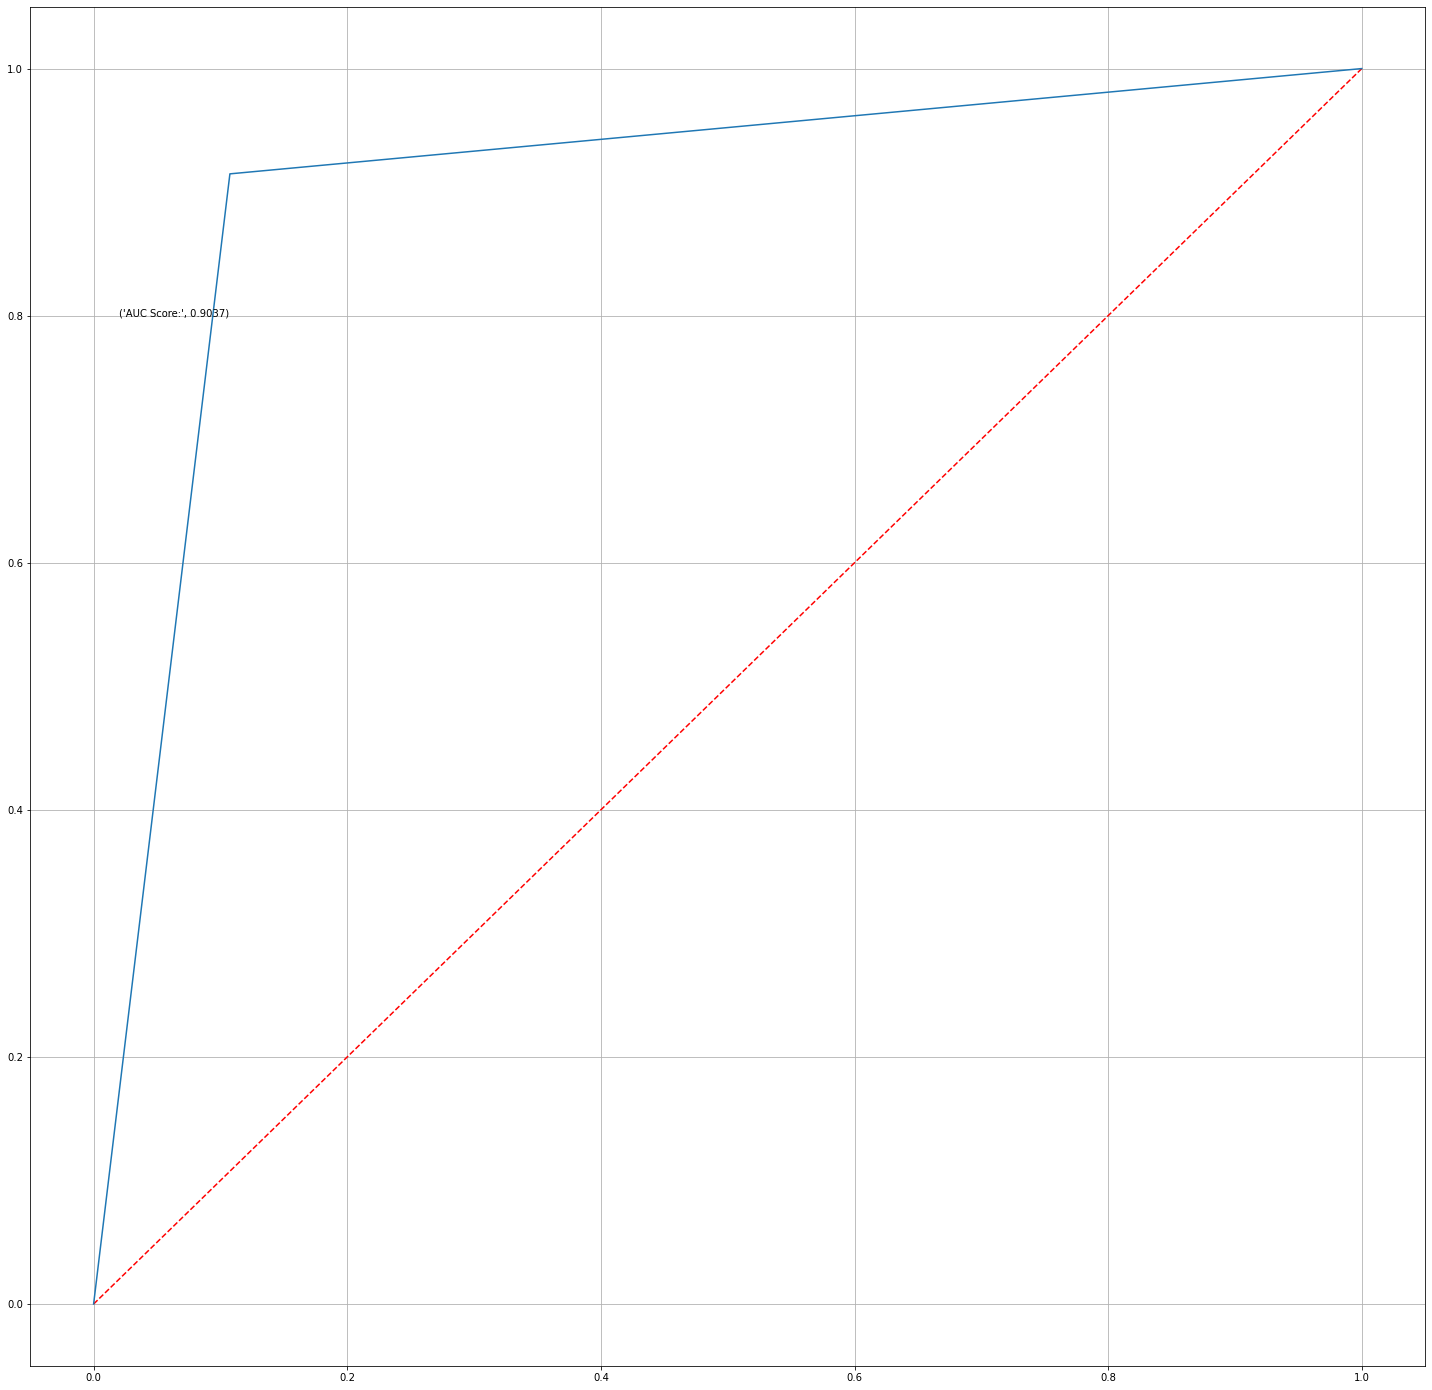

In [219]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree_full)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_decision_tree_full),4)))
                            
plt.grid(True)

In [220]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full)
print('kappa value:',kappa)

kappa value: 0.8072127725684763


In [ ]:
%pip install pydotplus
import pydotplus
from IPython.display import Image  

import random

In [ ]:
import sys
!{sys.executable} -m pip install pydotplus

In [ ]:
pip install graphviz

In [ ]:
conda install graphviz

In [ ]:
decision_tree_classification = DecisionTreeClassifier(max_leaf_nodes = 20)

dt_model = decision_tree_classification.fit(X_train, y_train)

labels = X_train.columns

dot_data = tree.export_graphviz(dt_model, feature_names = labels, class_names = ["No","Yes"])  

graph = pydotplus.graph_from_dot_data(dot_data)  

# display the decision tree
Image(graph.create_png())

In [221]:
decision_tree_model = DecisionTreeClassifier()

scores = cross_val_score(estimator = decision_tree_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'accuracy')

print("Mean accuracy after 10 fold cross validation: ", round(scores.mean(), 2))

Mean accuracy after 10 fold cross validation:  0.9


# Decision Tree full model (Entropy criteria)

In [223]:
decision_tree_full_ent = DecisionTreeClassifier(criterion = 'entropy', random_state=10)
decision_tree_full_ent = decision_tree_full_ent.fit(X_train, y_train)
y_pred_decision_tree_full_ent = decision_tree_full_ent.predict(X_test)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_full_ent.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
5,num_procedures,0.219990
8,service_utilization_log1p,0.217168
3,time_in_hospital,0.168377
1,index,0.076204
2,age,0.062448
4,num_lab_procedures,0.045834
6,num_medications,0.033709
13,gender_1,0.029237
7,number_diagnoses,0.024280
14,admission_type_id_2,0.011820


In [224]:
cm = confusion_matrix(y_test, y_pred_decision_tree_full_ent)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9052321778940484


In [225]:
table_full_ent = classification_report(y_test, y_pred_decision_tree_full_ent)

# print the table
print(table_full_ent)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7686
           1       0.90      0.91      0.91      7604

    accuracy                           0.91     15290
   macro avg       0.91      0.91      0.91     15290
weighted avg       0.91      0.91      0.91     15290



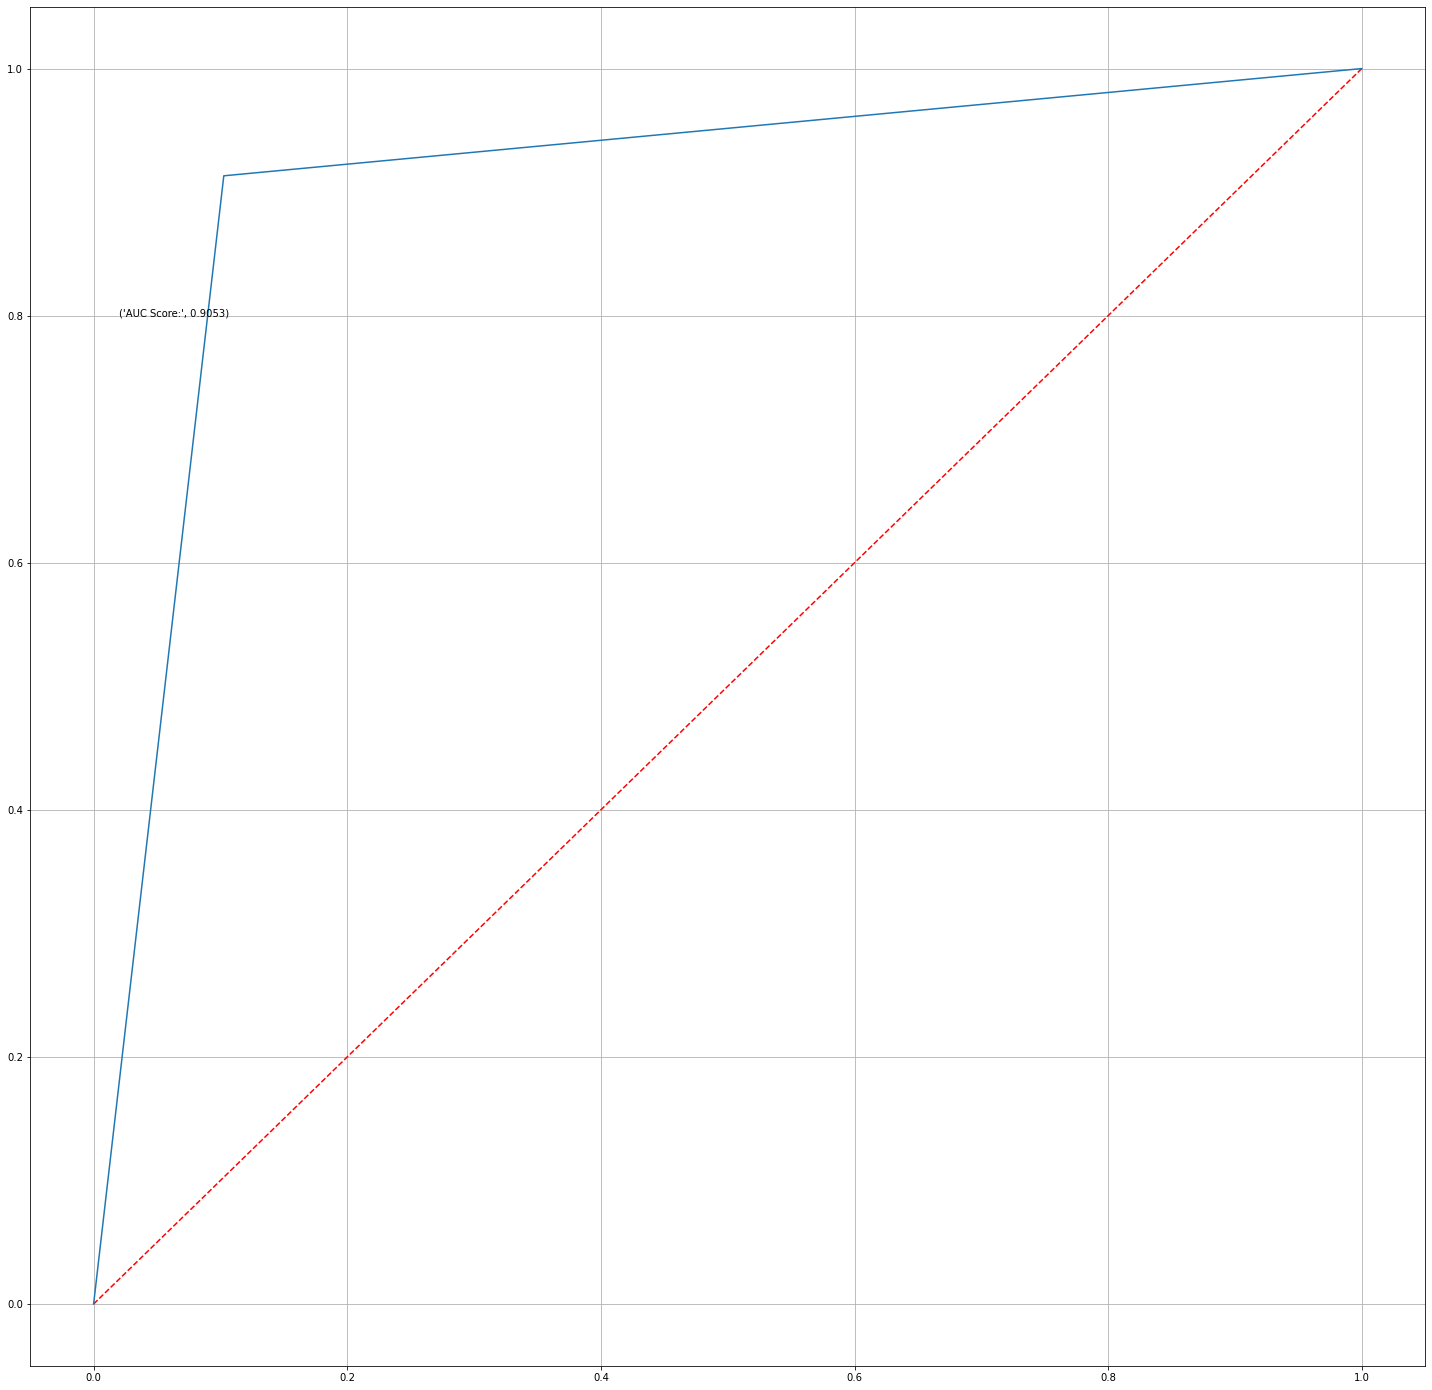

In [226]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree_full_ent)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_decision_tree_full_ent),4)))
                            
plt.grid(True)

In [227]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_decision_tree_full_ent)
print('kappa value:',kappa)

kappa value: 0.8104760555126155


# Finding Tuned Parameters for Decision Tree

In [228]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'max_depth': range(2, 25),
                     'min_samples_split': range(2,10)}]
 
decision_tree_model = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 9} 



In [229]:
decision_tree_tuned_model = DecisionTreeClassifier(criterion = tree_grid.best_params_['criterion'], 
                                                   max_depth = tree_grid.best_params_['max_depth'], 
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'])

scores = cross_val_score(estimator = decision_tree_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.94


In [230]:
decision_tree_tuned_model = decision_tree_tuned_model.fit(X_train, y_train)

y_pred_decision_tree_tuned = decision_tree_tuned_model.predict(X_test)

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree_tuned_model.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
8,service_utilization_log1p,0.264555
5,num_procedures,0.262089
3,time_in_hospital,0.189945
2,age,0.062373
1,index,0.042313
13,gender_1,0.033912
4,num_lab_procedures,0.020501
6,num_medications,0.017916
7,number_diagnoses,0.015943
14,admission_type_id_2,0.011553


In [231]:
table_full = classification_report(y_test, y_pred_decision_tree_tuned)

# print the table
print(table_full)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7686
           1       0.96      0.89      0.92      7604

    accuracy                           0.93     15290
   macro avg       0.93      0.93      0.93     15290
weighted avg       0.93      0.93      0.93     15290



In [232]:
cm = confusion_matrix(y_test, y_pred_decision_tree_tuned)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9266187050359712


In [233]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_decision_tree_tuned)
print('kappa value:',kappa)

kappa value: 0.853168707446615


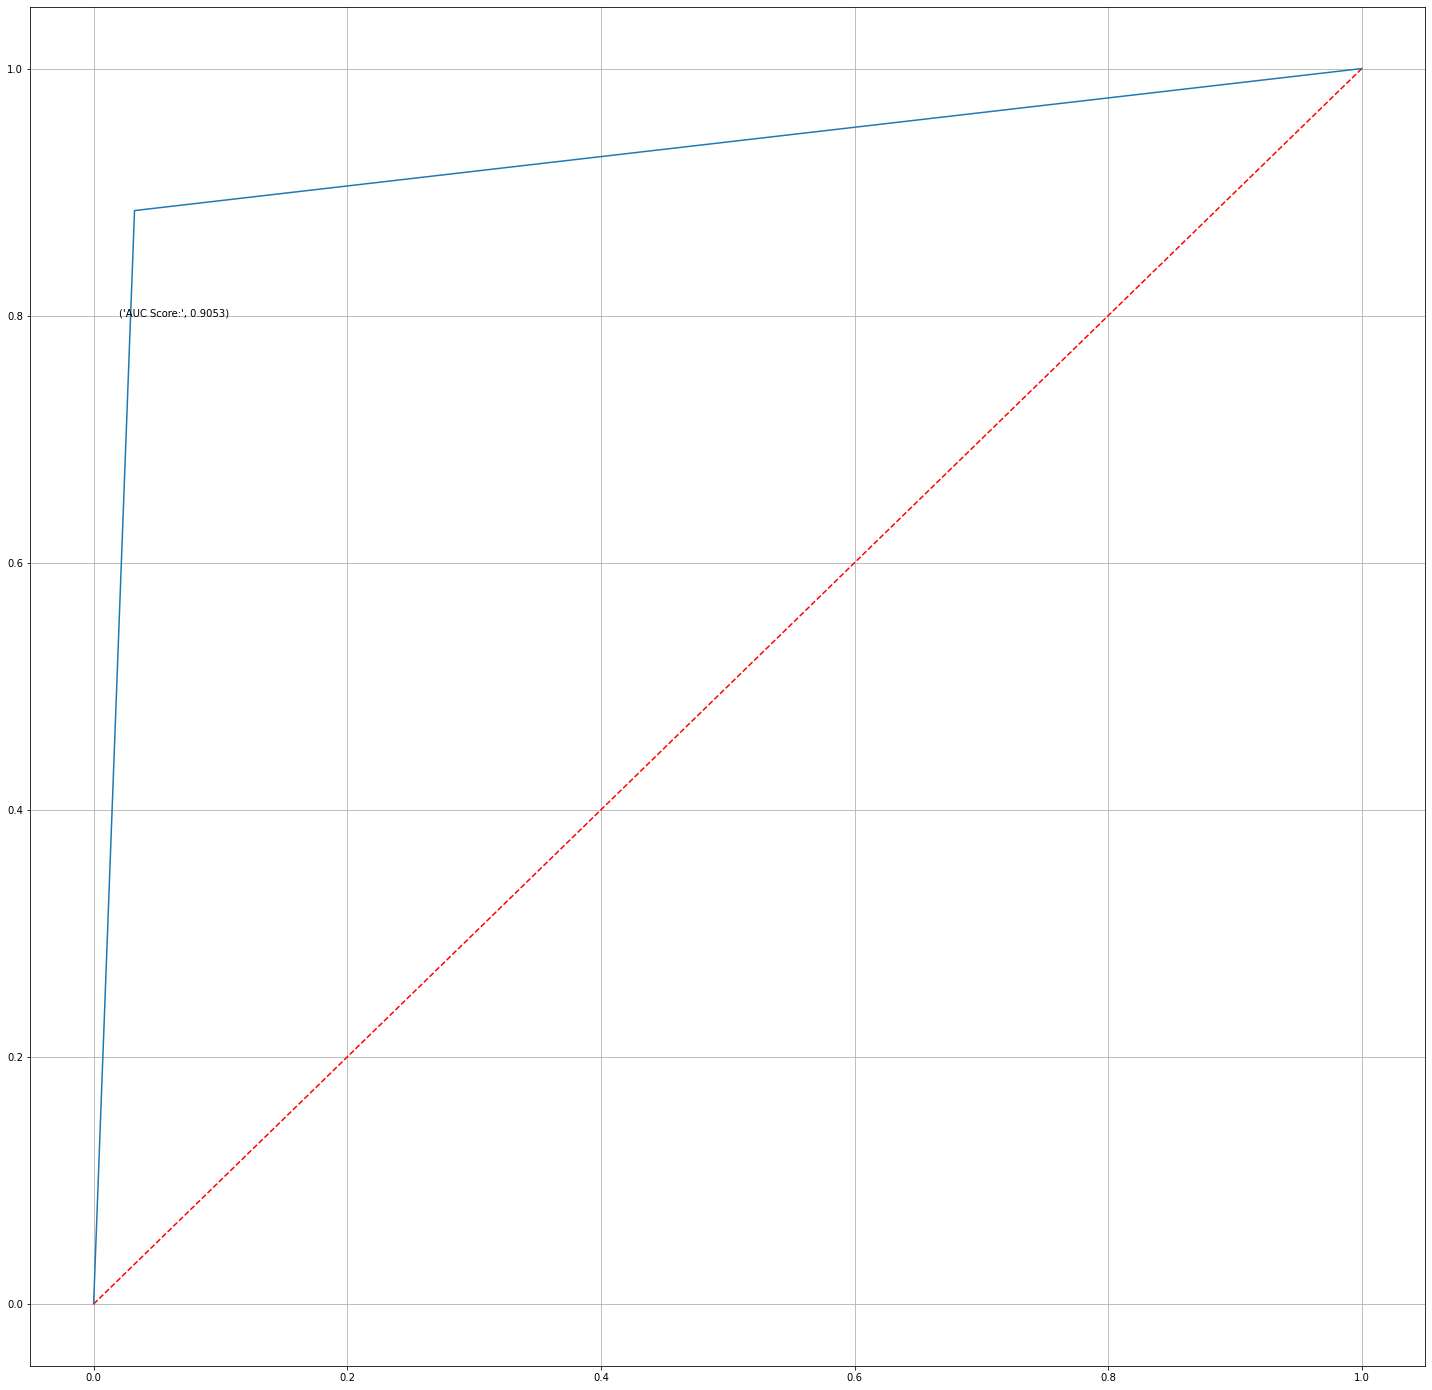

In [234]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision_tree_tuned)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_decision_tree_full_ent),4)))
                            
plt.grid(True)

# Random Forest

In [235]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

rf_model = rf_classification.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7686
           1       0.99      0.90      0.94      7604

    accuracy                           0.95     15290
   macro avg       0.95      0.94      0.94     15290
weighted avg       0.95      0.95      0.95     15290



In [236]:
cm = confusion_matrix(y_test, y_pred_rf)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9451275343361675


In [237]:
kappa = cohen_kappa_score(y_test, y_pred_rf)
print('kappa value:',kappa)

kappa value: 0.8902005352996833


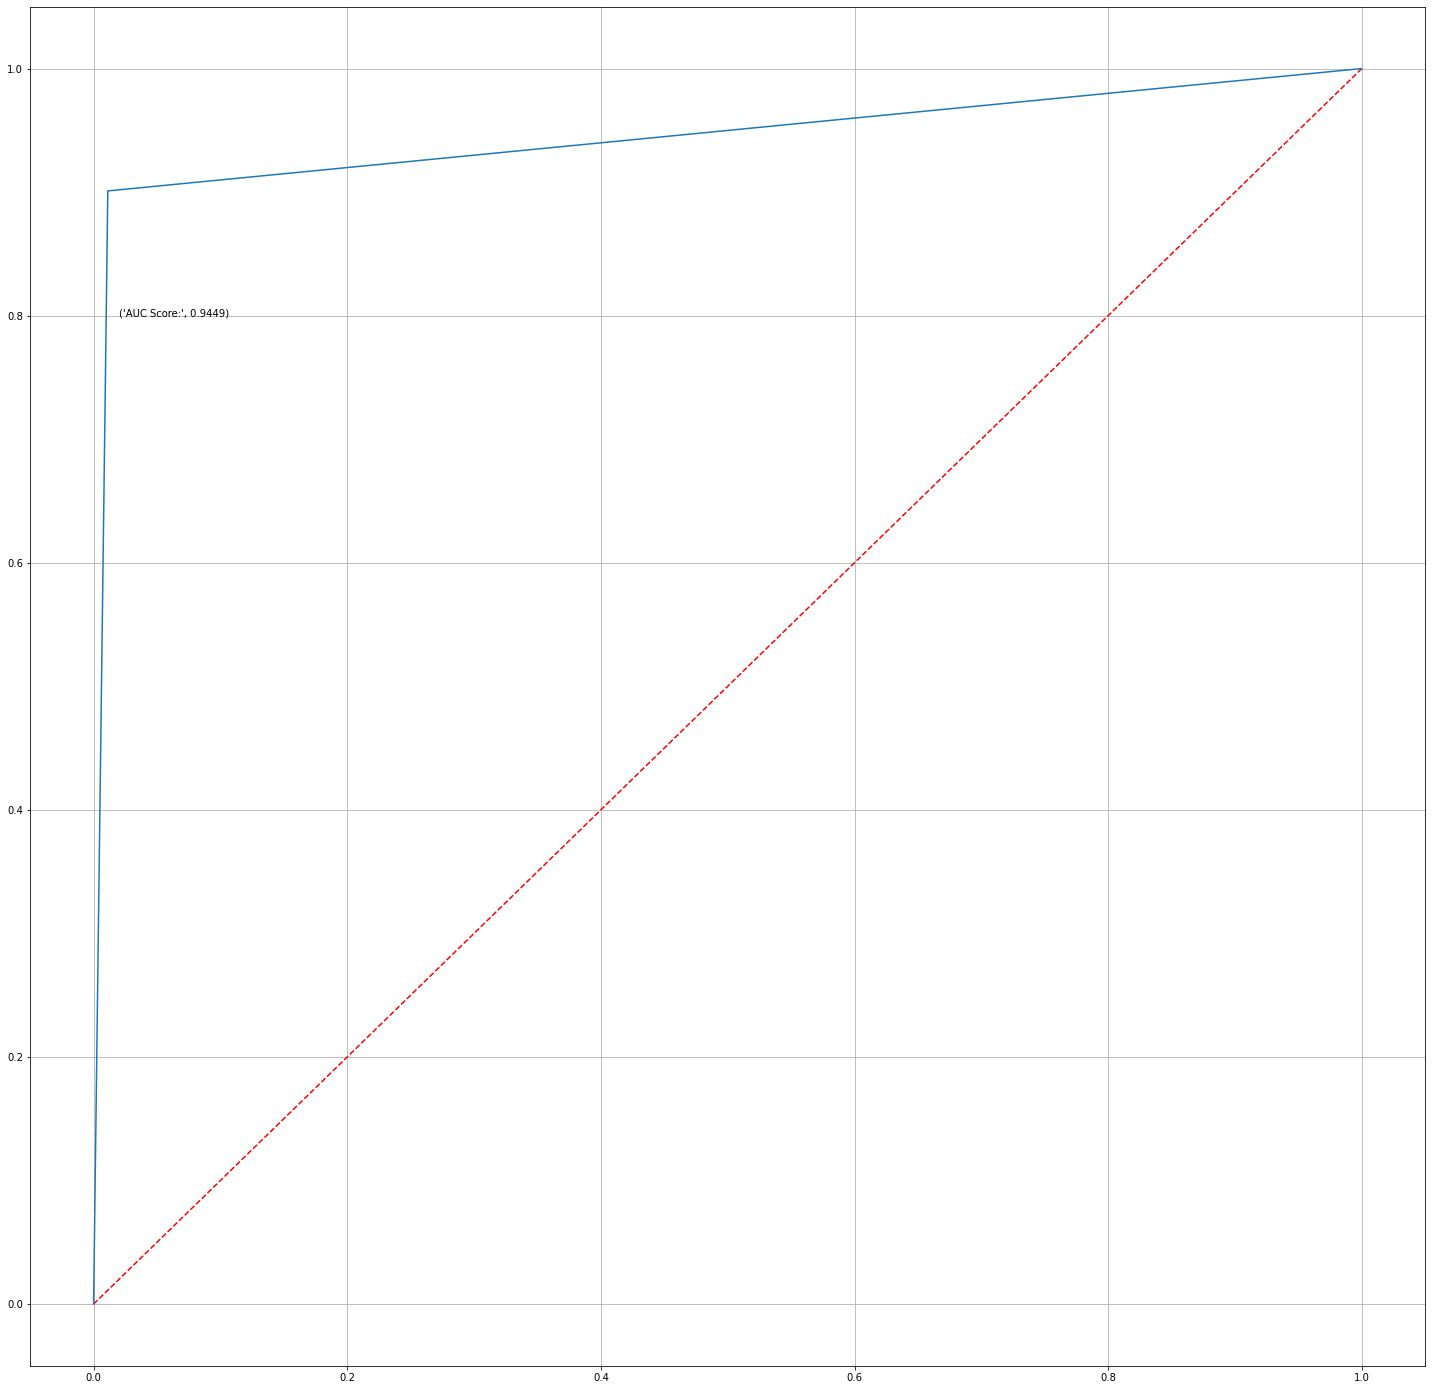

In [238]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf),4)))
                            
plt.grid(True)

# Random Forest Tuned Parameters

In [239]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [90, 100, 150, 200],
                     'max_depth': [10, 15, 20],
                     'min_samples_split': [2, 5, 8]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_model_tuned = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest Classifier: ', rf_model_tuned.best_params_, '\n')

Best parameters for random forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} 



In [240]:
random_forest_tuned_model = RandomForestClassifier(criterion = rf_model_tuned.best_params_['criterion'], 
                                                   max_depth = rf_model_tuned.best_params_['max_depth'], 
                                                   min_samples_split = rf_model_tuned.best_params_['min_samples_split'], 
                                                   n_estimators = rf_model_tuned.best_params_['n_estimators'],
                                                   random_state = 10)


scores = cross_val_score(estimator = random_forest_tuned_model, 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'roc_auc')

# get the average of the ROC-AUC scores obtained after 10 fold cross validation
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Mean ROC-AUC score after 10 fold cross validation:  0.97


In [241]:
random_forest_tuned_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, 
                                                   min_samples_split = 2, n_estimators = 150,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

y_pred_rf_tuned = random_forest_tuned_model.predict(X_test)

print(classification_report(y_test, y_pred_rf_tuned))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7686
           1       0.99      0.91      0.95      7604

    accuracy                           0.95     15290
   macro avg       0.95      0.95      0.95     15290
weighted avg       0.95      0.95      0.95     15290



In [242]:
cm = confusion_matrix(y_test, y_pred_rf_tuned)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9478090255068672


In [243]:
kappa = cohen_kappa_score(y_test, y_pred_rf_tuned)
print('kappa value:',kappa)

kappa value: 0.8955696274036132


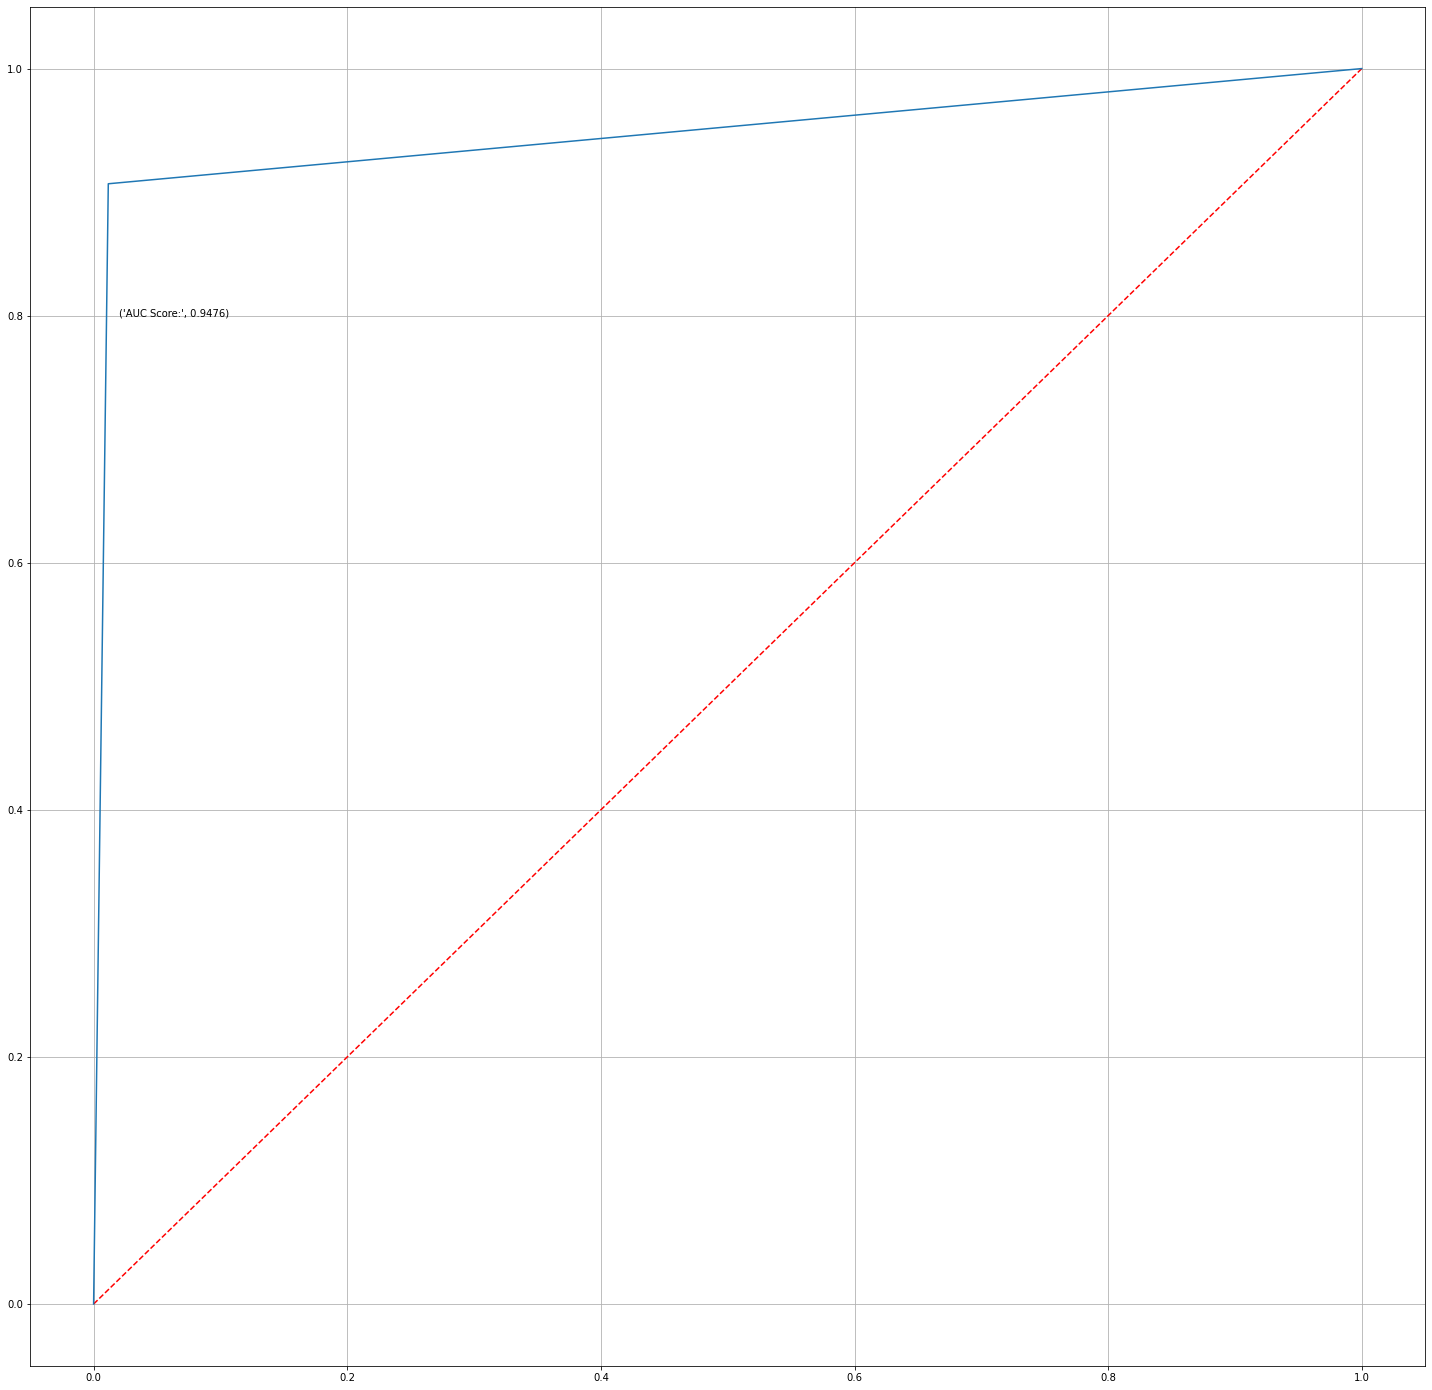

In [244]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_tuned)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf_tuned),4)))
                            
plt.grid(True)

# Random Forest with significant features

Finding important features

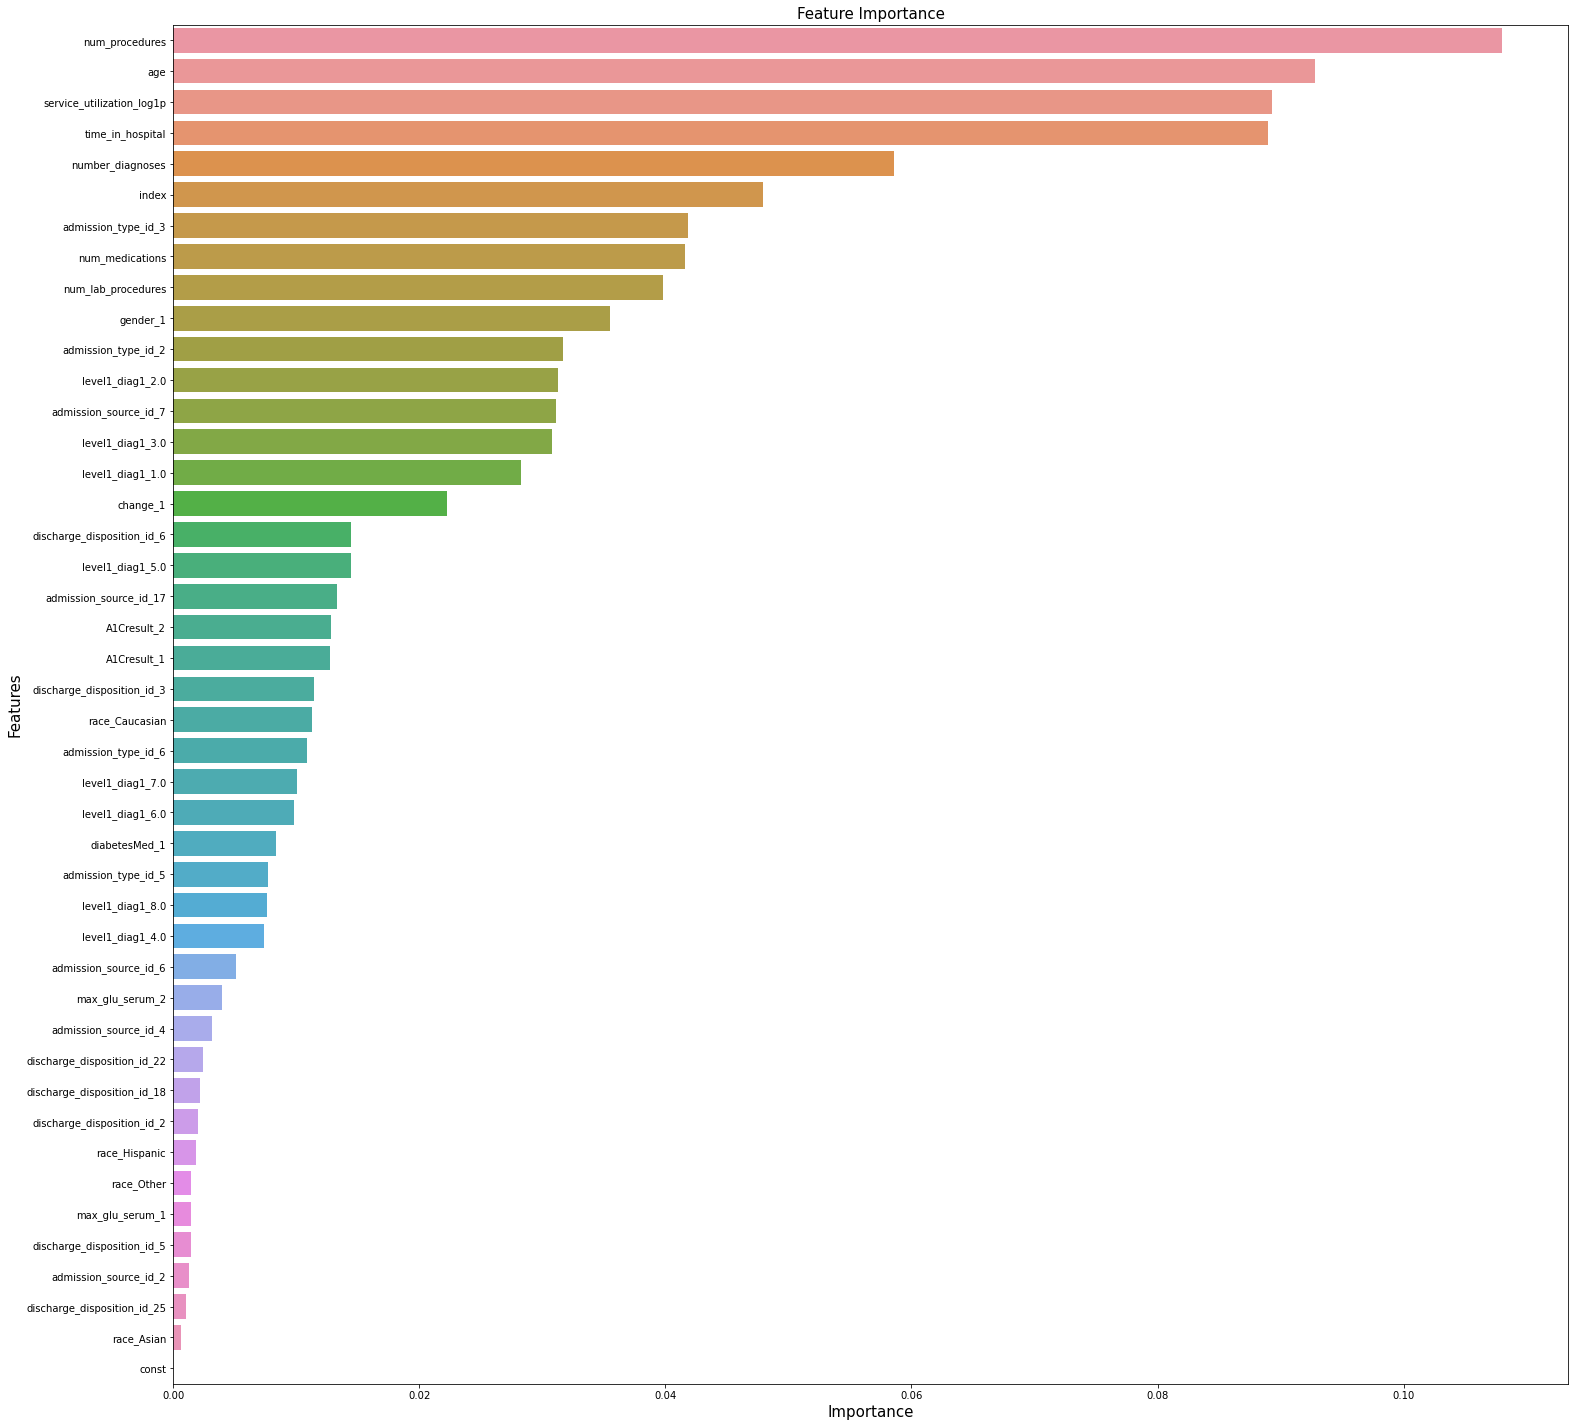

In [245]:
random_forest_tuned_model_significant = RandomForestClassifier(criterion = 'entropy', max_depth = 20, 
                                                   min_samples_split = 2, n_estimators = 150,
                                                   random_state = 10)

# use fit() to fit the model on the train set
random_forest_tuned_model_significant = random_forest_tuned_model_significant.fit(X_train, y_train)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model_significant.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [246]:
important_columns = list(important_features['Features'].iloc[:10])

# use fit() to fit the model on the train set
random_forest_tuned_model_significant = random_forest_tuned_model_significant.fit(X_train[important_columns], y_train)

# predict the attrition for test set
y_pred_rf_sf = random_forest_tuned_model_significant.predict(X_test[important_columns])

In [247]:

print(classification_report(y_test, y_pred_rf_sf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7686
           1       1.00      0.90      0.95      7604

    accuracy                           0.95     15290
   macro avg       0.96      0.95      0.95     15290
weighted avg       0.96      0.95      0.95     15290



In [248]:
cm = confusion_matrix(y_test, y_pred_rf_sf)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.951144538914323


In [249]:
kappa = cohen_kappa_score(y_test, y_pred_rf_sf)
print('kappa value:',kappa)

kappa value: 0.9022354466859234


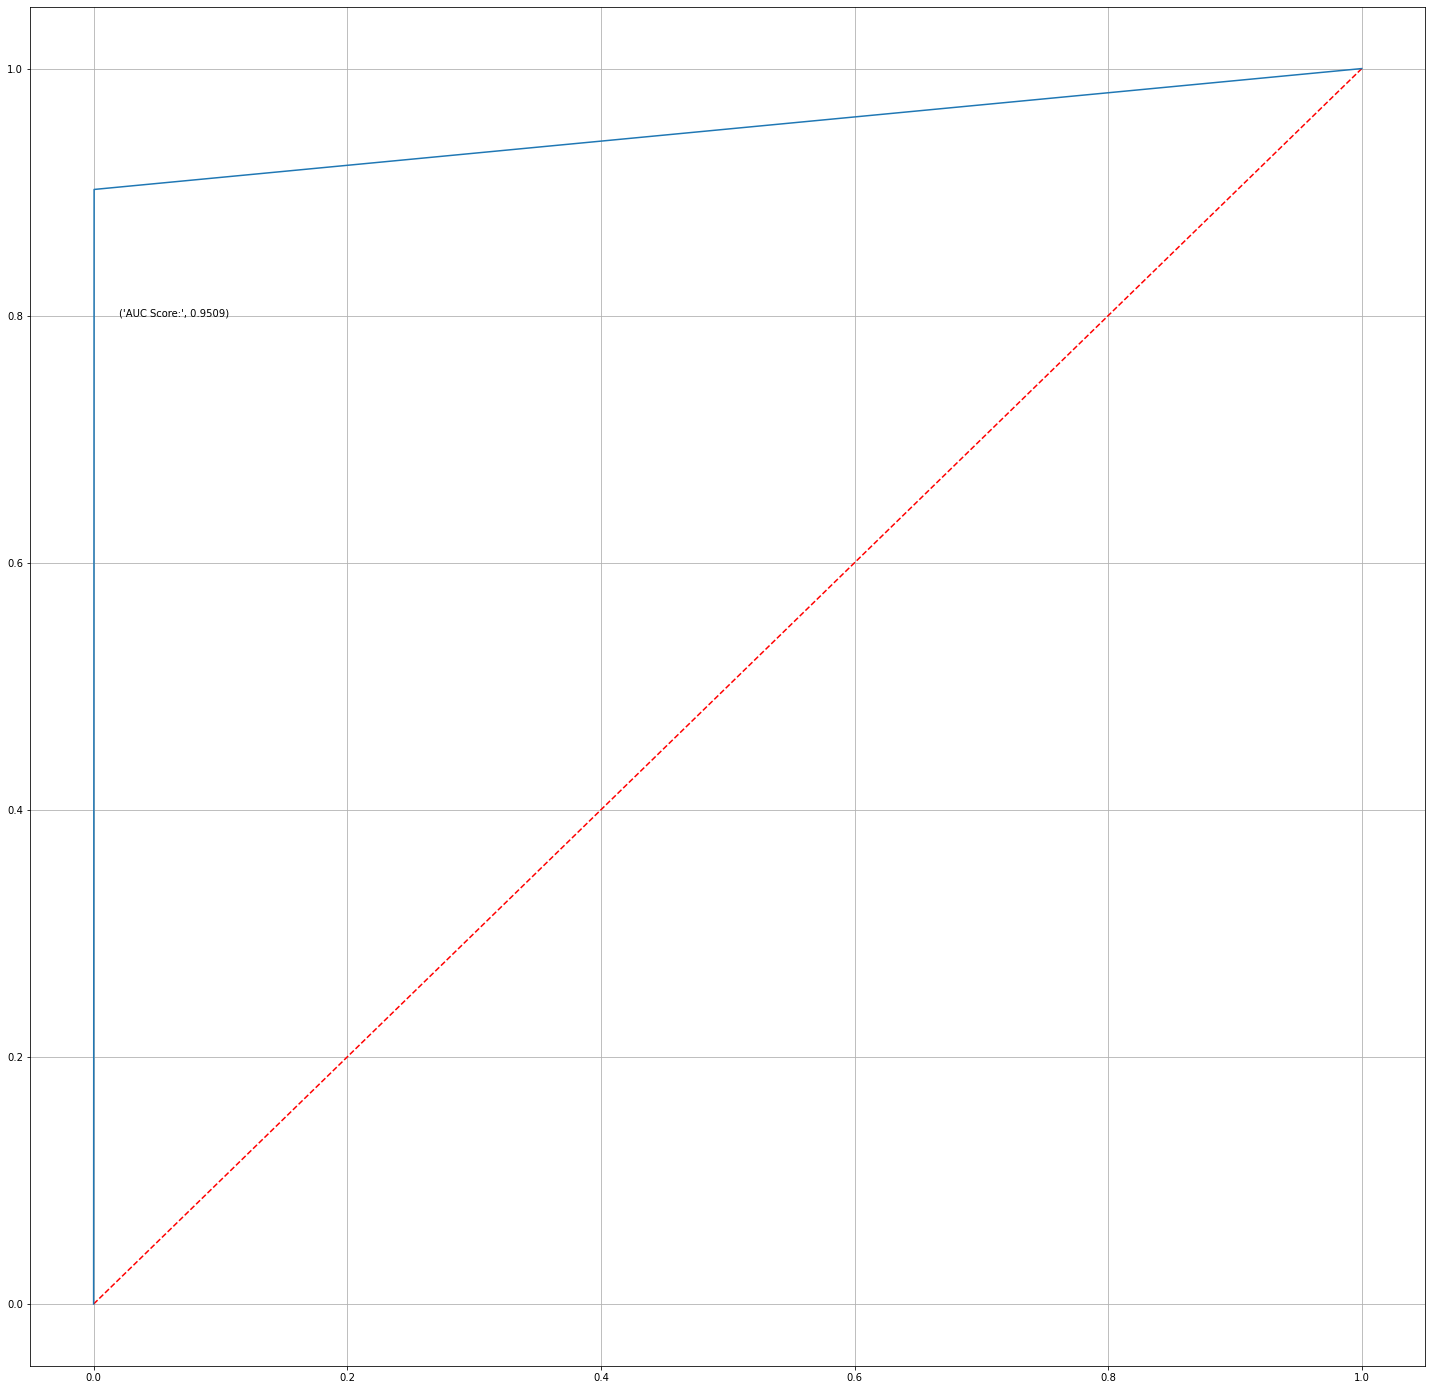

In [250]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_sf)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_rf_sf),4)))
                            
plt.grid(True)

# AdaBoost

In [251]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

In [252]:
y_pred_ada = ada_model.predict(X_test)

print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      7686
           1       0.93      0.89      0.91      7604

    accuracy                           0.91     15290
   macro avg       0.91      0.91      0.91     15290
weighted avg       0.91      0.91      0.91     15290



In [253]:
kappa = cohen_kappa_score(y_test, y_pred_ada)
print('kappa value:',kappa)

kappa value: 0.8245540672519768


In [254]:
cm = confusion_matrix(y_test, y_pred_ada)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9122956180510138


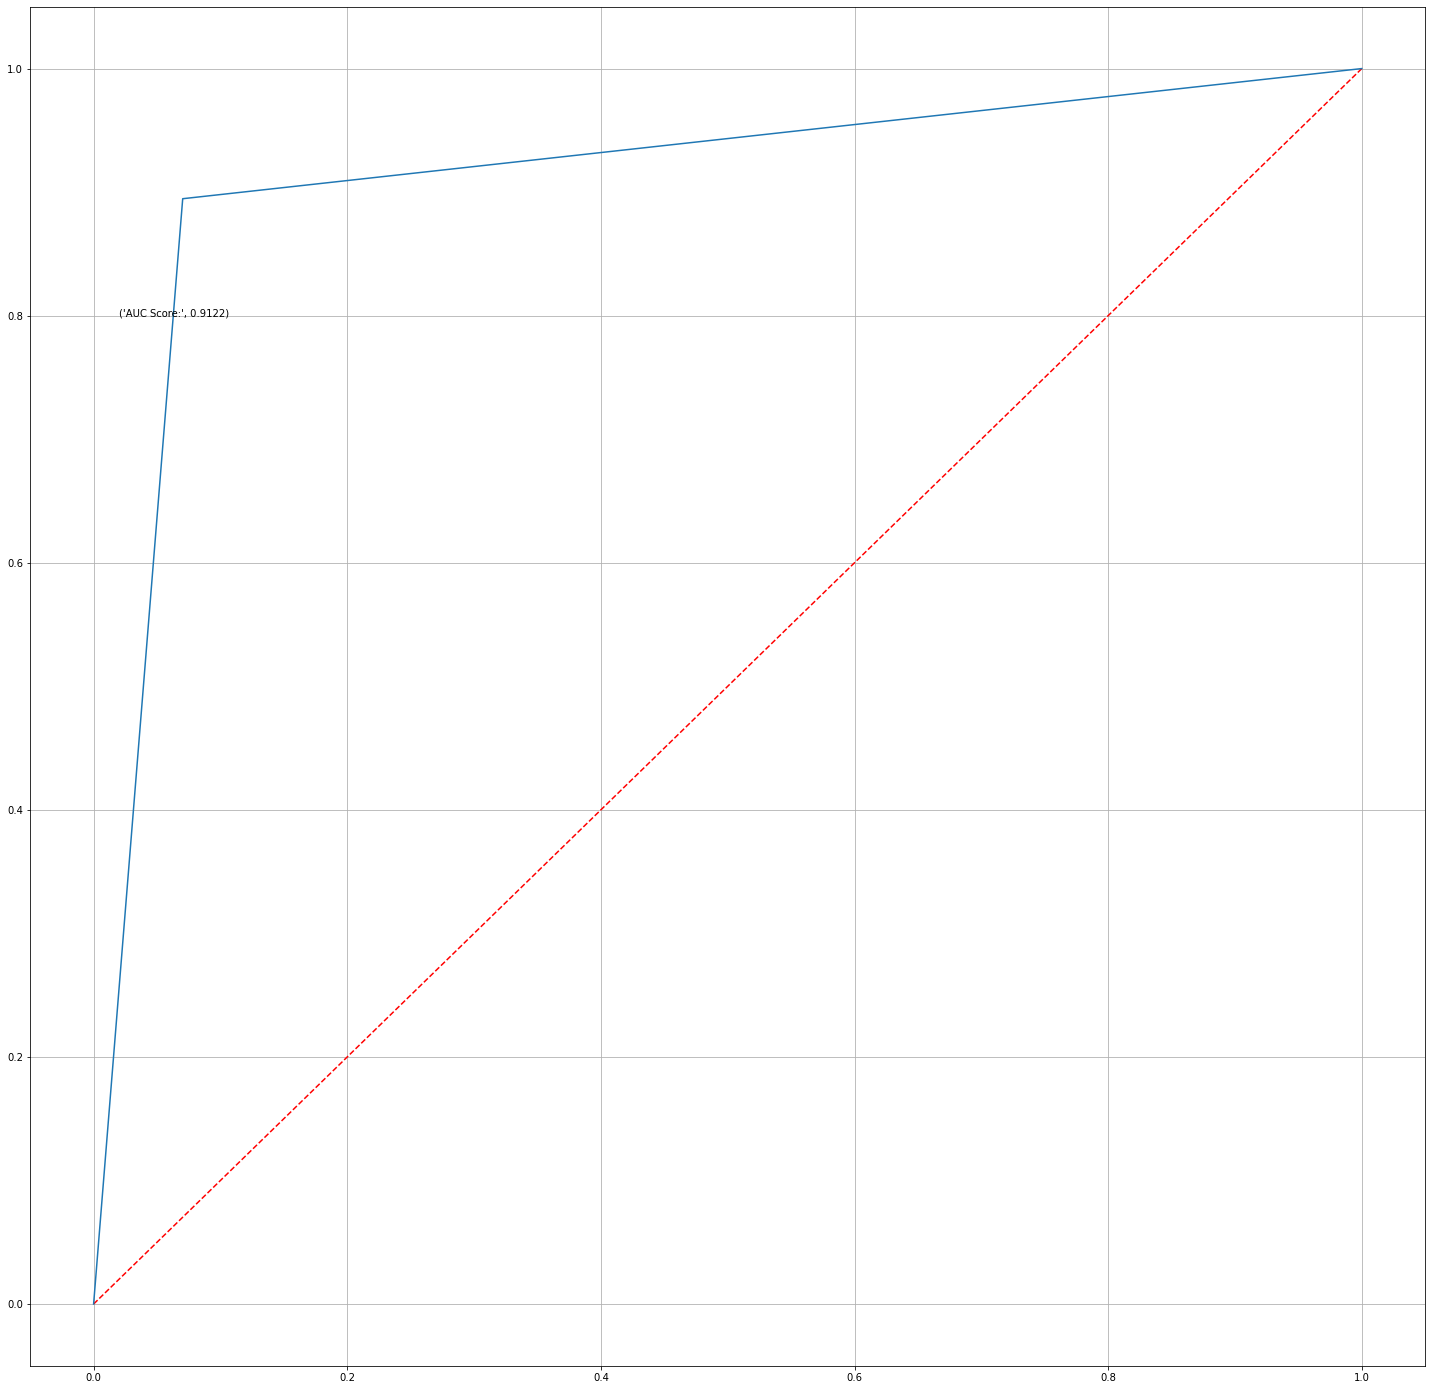

In [255]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ada)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_ada),4)))
                            
plt.grid(True)

# Gradient Boosting

In [256]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)

# fit the model using fit() on train data
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=150, random_state=10)

In [257]:
y_pred_gboost = gboost_model.predict(X_test)

print(classification_report(y_test, y_pred_gboost))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7686
           1       1.00      0.91      0.95      7604

    accuracy                           0.95     15290
   macro avg       0.96      0.95      0.95     15290
weighted avg       0.96      0.95      0.95     15290



In [258]:
kappa = cohen_kappa_score(y_test, y_pred_gboost)
print('kappa value:',kappa)

kappa value: 0.9095711172473618


In [259]:
cm = confusion_matrix(y_test, y_pred_gboost)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.954807063440157


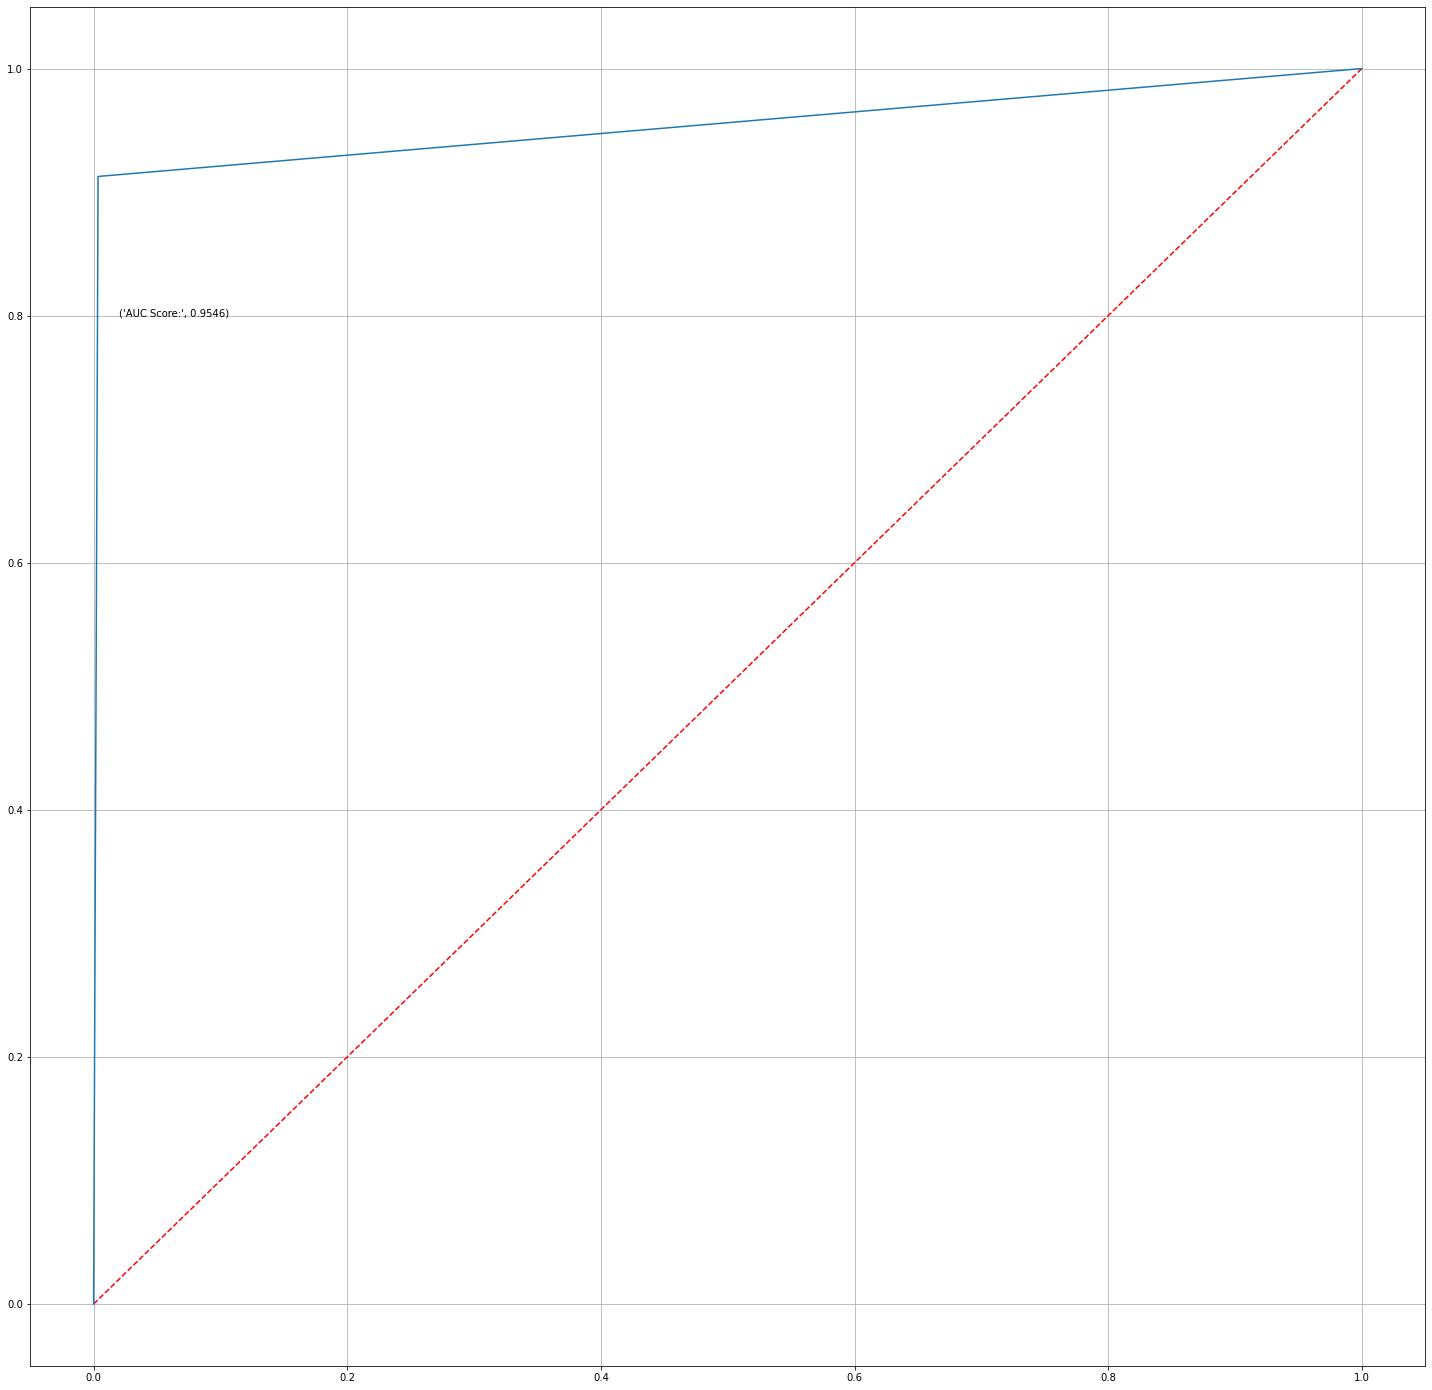

In [260]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gboost)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_gboost),4)))
                            
plt.grid(True)

# XGBoost

In [261]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [262]:
y_pred_xgb = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7686
           1       0.99      0.91      0.95      7604

    accuracy                           0.95     15290
   macro avg       0.96      0.95      0.95     15290
weighted avg       0.96      0.95      0.95     15290



In [263]:
cm = confusion_matrix(y_test, y_pred_xgb)

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9525833878351864


In [264]:
kappa = cohen_kappa_score(y_test, y_pred_xgb)
print('kappa value:',kappa)

kappa value: 0.9051248459543827


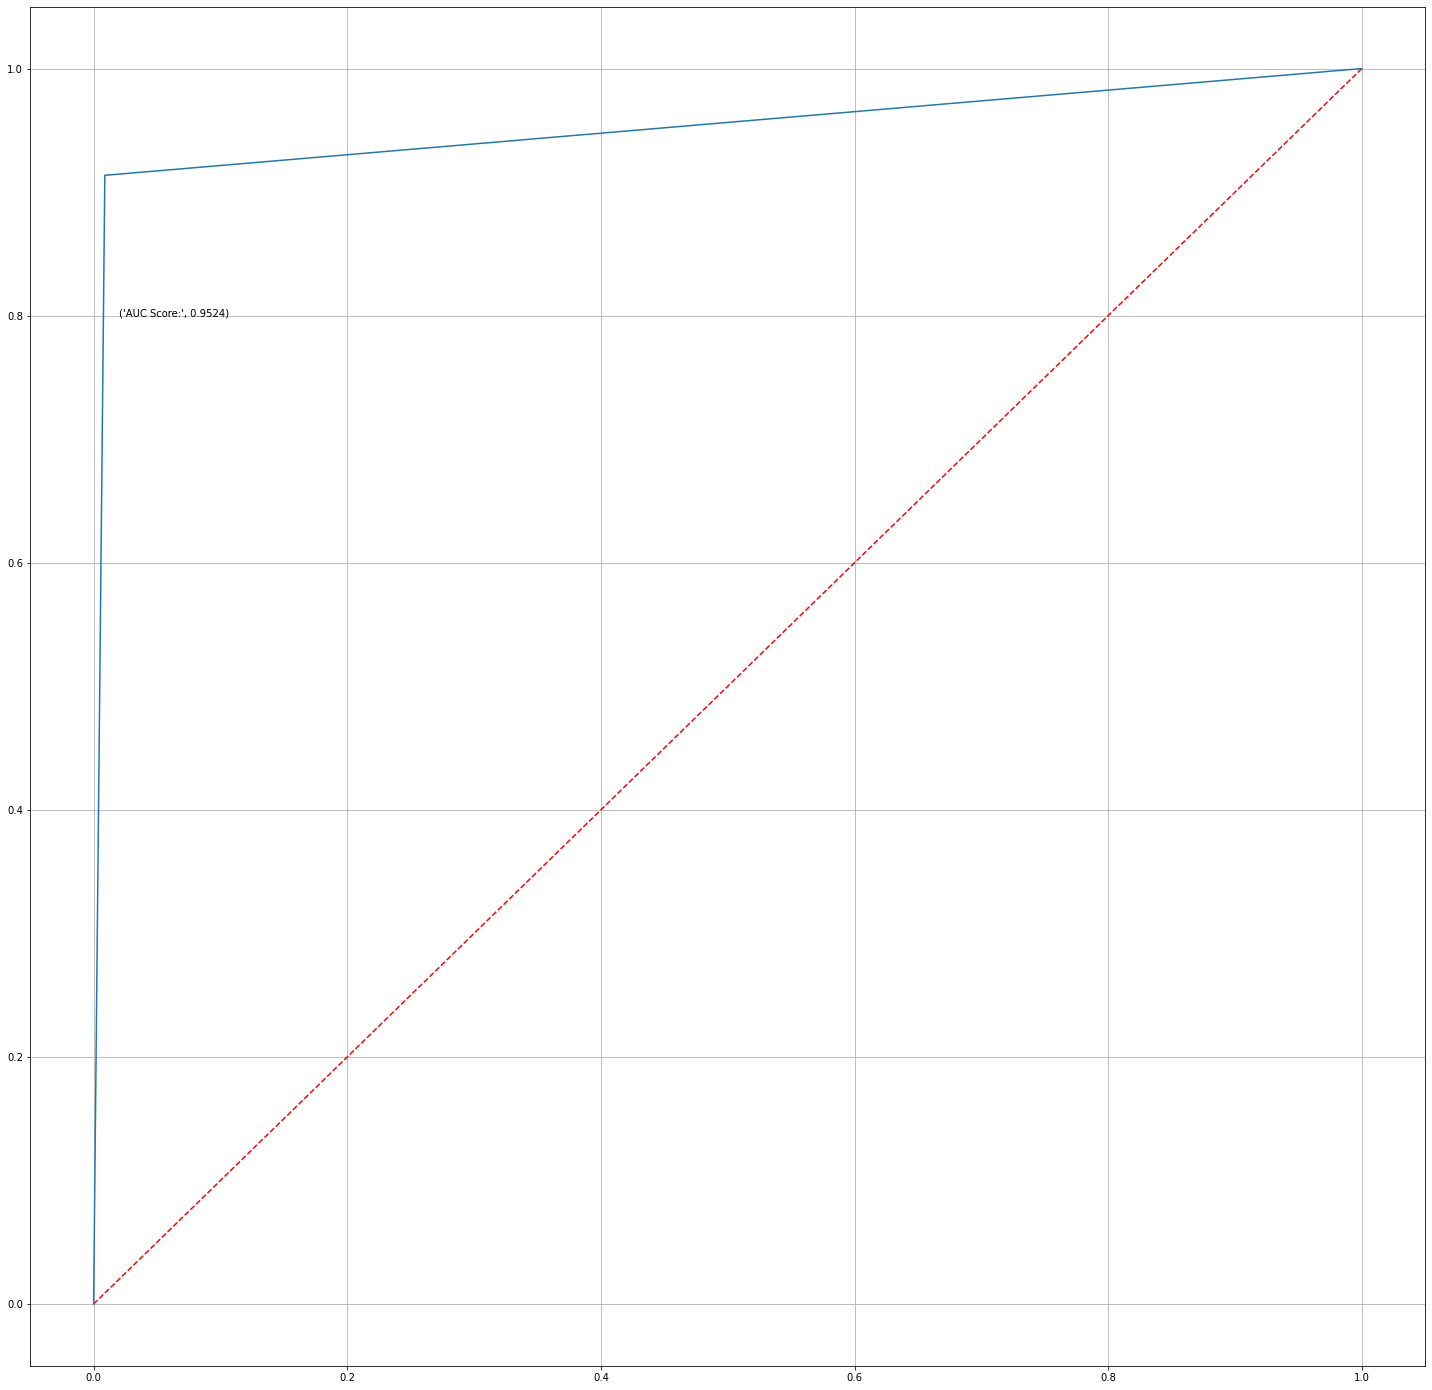

In [265]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_xgb),4)))
                            
plt.grid(True)

# Model Evaluation

# K-fold Cross Valiation

In [269]:
logreg_fitted = LogisticRegression() 
logreg_fitted_scores = cross_val_score(logreg_fitted, X_train_fitted , y_train_fitted, cv=10)
logreg_fitted_scores

array([0.66317855, 0.66530412, 0.49934598, 0.65353172, 0.49934598,
       0.49934598, 0.66137999, 0.49934598, 0.65478332, 0.4992641 ])

In [270]:
X_train_rfe = X_train_full[['age', 'time_in_hospital', 'number_diagnoses',
       'service_utilization_log1p', 'gender_1', 'admission_type_id_2',
       'admission_type_id_3', 'admission_source_id_7', 'change_1',
       'level1_diag1_1.0']]
logreg_rfe = LogisticRegression() 
logreg_rfe_scores = cross_val_score(logreg_rfe, X_train_rfe , y_train_rfe, cv=10)
logreg_rfe_scores

array([0.75833878, 0.75441465, 0.75621321, 0.75376063, 0.76291694,
       0.76062786, 0.75408764, 0.74623937, 0.76549469, 0.75568275])

In [271]:
dtc = DecisionTreeClassifier(criterion='entropy')

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

dtc_score = cross_val_score(dtc, X_train, y_train , cv=kfold, scoring='roc_auc', n_jobs=-1)

print(dtc_score)
print('Cross-Val Score: ' ,dtc_score.mean())

[0.90982431 0.90517454 0.90761426 0.90565255 0.90974078 0.90057938
 0.90363252 0.91314306 0.90595416 0.90042789]
Cross-Val Score:  0.9061743458494733


In [272]:
rfcl = RandomForestClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

rfcl_score = cross_val_score(rfcl, X_train, y_train , cv=kfold, scoring='roc_auc', n_jobs=-1)

print(rfcl_score)
print('Cross-Val Score: ' ,rfcl_score.mean())

[0.97172889 0.96831571 0.96669277 0.96608272 0.96545481 0.96930892
 0.96811814 0.9701879  0.96498906 0.96750852]
Cross-Val Score:  0.9678387440230469


In [274]:
abc = AdaBoostClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

abc_score = cross_val_score(abc, X_train, y_train , cv=kfold, scoring='roc_auc', n_jobs=-1)

print(abc_score)
print('Cross-Val Score: ' ,abc_score.mean())

[0.96022106 0.95201922 0.95225368 0.95079932 0.95013622 0.95412943
 0.95390065 0.9548609  0.95207518 0.9537744 ]
Cross-Val Score:  0.953417005936062


In [275]:
gbc = GradientBoostingClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

gbc_score = cross_val_score(gbc, X_train, y_train , cv=kfold, scoring='roc_auc', n_jobs=-1)

print(gbc_score)
print('Cross-Val Score: ' ,gbc_score.mean())

[0.96327759 0.9602504  0.95550586 0.95768244 0.95403387 0.9593086
 0.9619894  0.95879153 0.9558596  0.96006825]
Cross-Val Score:  0.9586767532928488


In [277]:
xgbc = XGBClassifier(n_estimators=50)

kfold = KFold(n_splits=10 , random_state=1, shuffle=True)

xgbc_score = cross_val_score(xgbc, X_train, y_train , cv=kfold, scoring='roc_auc', n_jobs=-1)

print(xgbc_score)
print('Cross-Val Score: ' ,xgbc_score.mean())

[0.96948526 0.96545169 0.96647905 0.96661692 0.96673477 0.96900527
 0.96703785 0.96829849 0.96471912 0.96835557]
Cross-Val Score:  0.9672184003345115


Text(0.5, 1.0, 'Mean of Cross validation score  vs model')

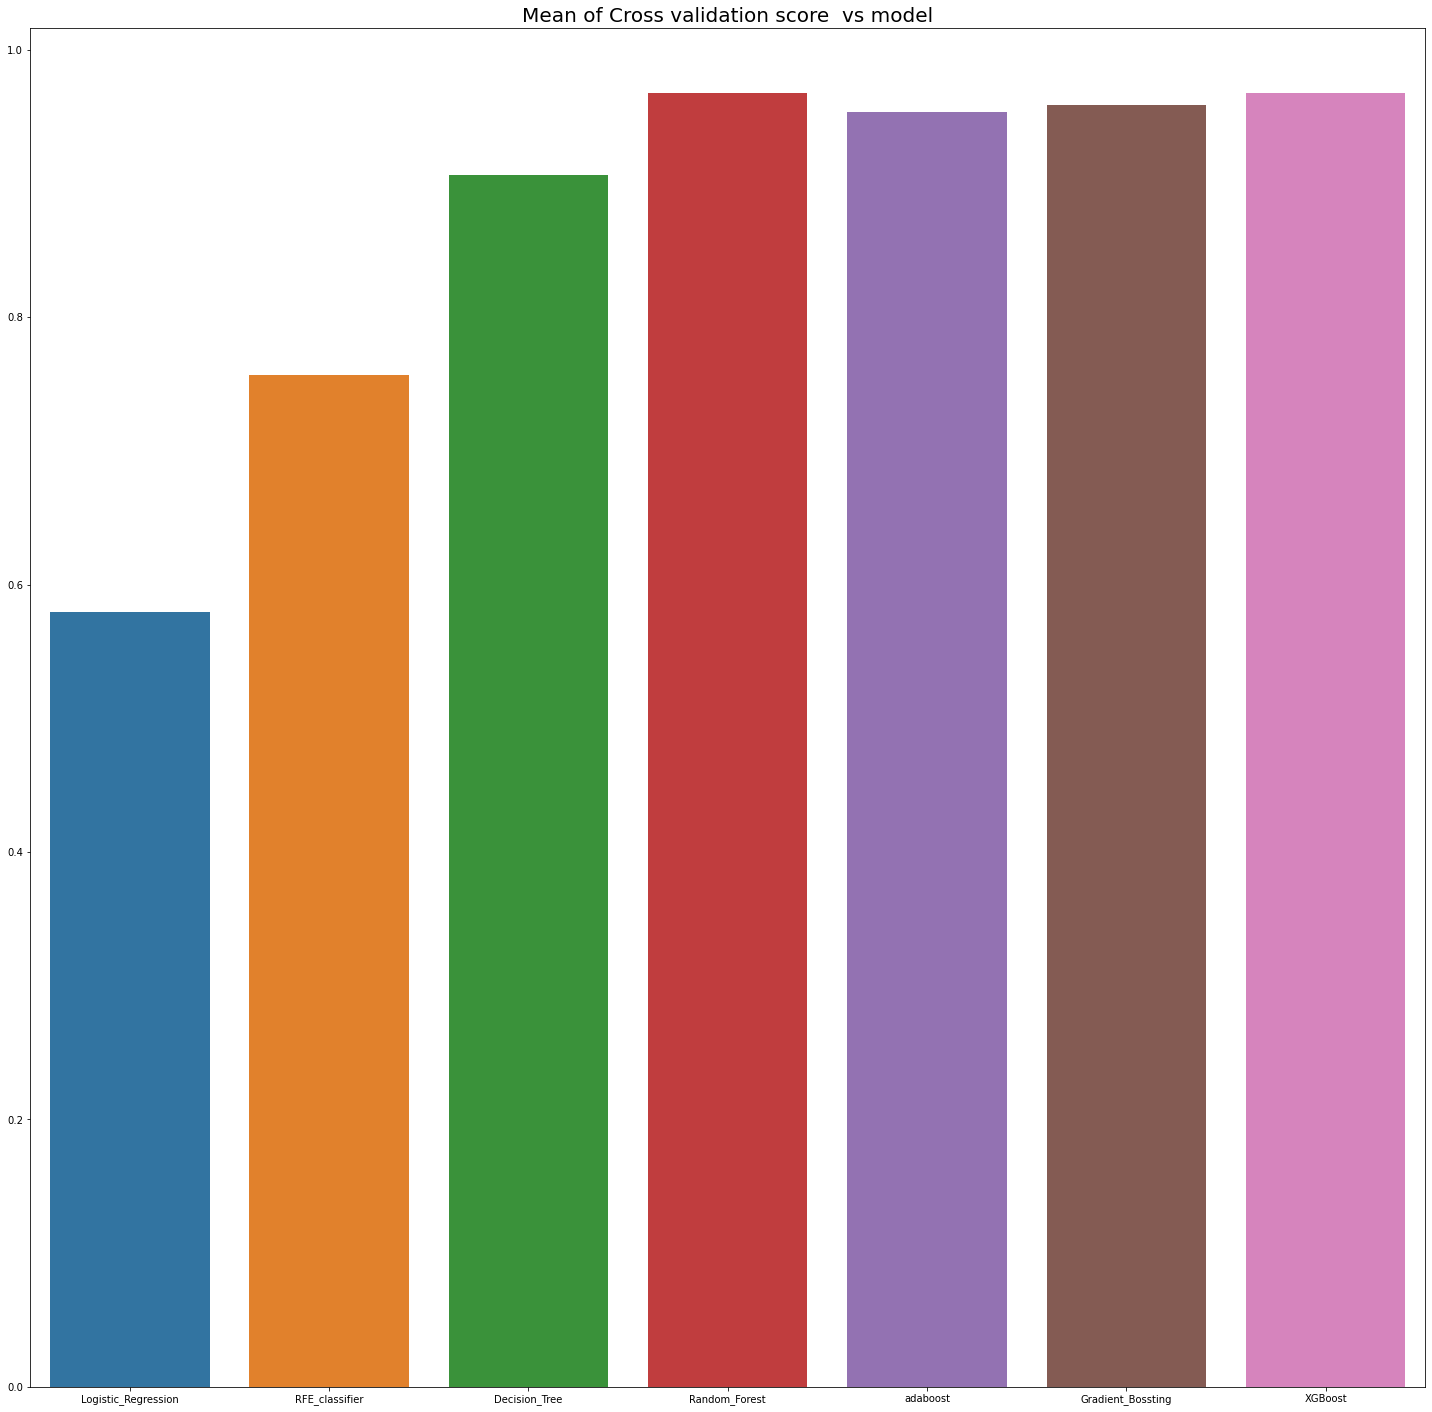

In [296]:
scores = []

scores.append(logreg_fitted_scores.mean())
scores.append(logreg_rfe_scores.mean())
scores.append(dtc_score.mean())
scores.append(rfcl_score.mean())
scores.append(abc_score.mean())
scores.append(gbc_score.mean())
scores.append(xgbc_score.mean())

names = ['Logistic_Regression', 'RFE_classifier', 'Decision_Tree', 'Random_Forest', 'adaboost', 'Gradient_Bossting', 'XGBoost']



sns.barplot(x=names, y = scores)
plt.title('Mean of Cross validation score  vs model', fontsize = 20)


